<br /><h1 style="font-family:Impact,Arial;font-size:70px;">Video Games evaluation and future gaming</h1>
<h2 style="font-family:Arial;">Wei Zuo</h2>
<h2 style="font-family:Arial;">12583884</h2>
<p><small> 37373 Programming for Data Analysis</small></p>
<p><small><font color=MediumVioletRed>Autumn 2020</font></small>
</p>
<hr style="height:5px;border:none;color:#333;background-color:#333;" />

# Abstract

Write a short (no more than 10 lines) summary of your project's topic and main goals.

This project will investigate and the review the evaluation of the video game industry include some of famous game company, platforms, publishers. Some of the  games may not only define the entire game generation but also have significant impact to the furture game development. This project will also combine some of real time historical event in order to insight critical aspect and better understand through out the analysis.


<hr style="height:5px;border:none;color:#333;background-color:#333;" />
<h1>1. Motivation</h1>

Write a detailed description of the problem and the original goal(s) of the study. Explain why you were interested in this topic and the type of insight you were hoping to get from the data.

As a gamer it always excetied to share with someone about their gaming experience and it more excetied to talk about the upcoming games. Video games have become part of my life since childhood I have witness how industry move from generations to generations in the past 20 years, I also witness how game devices change from TV to computer and even now to a protable device. 

In the modern time games will no longer only be define as entertainment product, it also can be consider as communication tool, business lifecycle and even treat as "The Ninth Art".

Video Game will keep evolve from time to time so does the gamer perspective to the game itself, game developers have the responsibility to deep research their customer behaviour and adjust their development strategy constantly by achieving their business achievement at the same time also change gamer the way and experience when they played new games.

Some of the following questions will be address during the project investigation:
<ul>
<li>From the game industry point of view what their business strategy, game development goal and how are they gain the profit through investment</li>

<li>As for cutsomer and gamer what kind of major factors will influence their decesion to choose games or gaming platforms</li>   

<li>How can the game community growth further and move to the next stage? What kind of changes must be done.</li>
       
<li>What the possible direction for the future gaming? Will video game industry popularlity falling down one day in the next 10 years?</li>


<hr style="height:5px;border:none;color:#333;background-color:#333;" />
<h1>2. The data</h1>

A clear description of the dataset(s) origin and a discussion of why it was chosen, as well as any restriction regarding the use, dissemination or modification of the data.

Note that wherever possible you should provide a link to the <b>unmodified, raw</b> data set.


<p>The dataset comes from multiple sources include data scientific research website, game news/article website, raw dataset collection website and various public resources.

These are some of the major dataset will deeply investigate in this project:


<b>Video concolse sales</b>

The first dataset I will be investigate which is manually create based on the multiple game news website such as <i>GameSpot</i>, <i>vgchartz</i> and <i>IGN</i> the table will be reference on their <a href="https://www.vgchartz.com/analysis/platform_totals/Hardware/Global/"><b>website chart</b></a>.
The dataset generate code will be see in the Data preparation session

Dataset output design reference:https://www.vgchartz.com/analysis/platform_totals/Hardware/Global/
    
<b>Video games sales on consoles</b>
    
The second dataset I have choose used the similar website reference as the first one. The dataset itself is clean and well organized therefore no need to perform complex data cleaning process, it also contains around 10000 uniques videos games release in the past 30 years across all the console platforms which is quite realiable and broadness to help the data investigation. 
    
Raw dataset link: https://data.world/julienf/video-games-global-sales-in-volume-1983-2017/contributors

Data gathering source code website: https://github.com/GregorUT/vgchartzScrape

    
<b>PC Games on Steam platform</b>
    
As one of the biggest and well-know PC gaming platform Steam will definitely heavely foucus in the project as well, Steam requires each user to have unique or multiple accounts for purchasing and accessing their game database. In order to successful play steam games user's account must be valid and authorised by game server which means it requires user must connect to online, this action can help stuff members easily record the user behaviours and their game history. The data itself was generate base on source code the link can be seen down below and all the information contains it under the offical Steam-API term of use policy 

Steam-API useage documentation:https://steamcommunity.com/dev

Accessable-URL and example for steam API:https://developer.valvesoftware.com/wiki/Steam_Web_API#GetPlayerSummaries_.28v0001.29    

Raw dataset link:https://data.world/craigkelly/steam-game-data

Original data collection source code :https://github.com/CraigKelly/steam-data

<b>Mobile game dataset</b>

Mobile Games is the last section I decide to add on until nearly end of project, unfortunately due to the user restrictions on Apps store and Trade secrets security policy it hard to gain access or find any of free version of dataset on internet therefore Wikipedia is my only releated source even though is not the best option 
    
Raw dataset/table link: https://en.wikipedia.org/wiki/List_of_highest-grossing_mobile_games

<hr style="height:5px;border:none;color:#333;background-color:#333;" />
<h1>3. Data preparation</h1>

Code and comments on how the raw data is put in a usable form (i.e., how you go from the raw data set(s) to the dataframe you are using for the analysis).

<b>Create as many code, markdown and raw cells as needed</b>

In [1]:
from math import *
import numpy as np
import pandas as pd
from pathlib import Path
import datetime as dt
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm 
import re
import seaborn as sns
import math
from itertools import chain

<h3>Console hardware dataset

In [2]:
#manually create date frame based on game website "vgchartz" and wikipedia for addtional information 
df_console_sale = pd.DataFrame([
   {"platform": "Neo Geo","Released_date":1990, "Publisher":"SNK","Console_type":"Home_console","North_America": 0,"Europe":0,"Japan":0,"Rest_of_world":0,"Global":0.98},
   {"platform": "Magnavox Odyssey","Released_date":1972, "Publisher":"Magnavox","Console_type":"Home_console","North_America": 0,"Europe":0,"Japan":0,"Rest_of_world":0,"Global":0.35},
   {"platform": "Home Pong","Released_date":1972, "Publisher":"Atari","Console_type":"Home_console","North_America": 0,"Europe":0,"Japan":0,"Rest_of_world":0,"Global":0.15},
   {"platform": "Magnavox Odyssey 2","Released_date":1978, "Publisher":"Magnavox","Console_type":"Home_console","North_America": 0,"Europe":0,"Japan":0,"Rest_of_world":0,"Global":2},
   {"platform": "Color TV-Game series","Released_date":1977, "Publisher":"Nintendo","Console_type":"Home_console","North_America": 0,"Europe":0,"Japan":0,"Rest_of_world":0,"Global":3}, 
   {"platform": "Atari7800","Released_date":1986,"Publisher":"Atari","Console_type":"Home_console","North_America": 4.30,"Europe":0,"Japan":0,"Rest_of_world":0,"Global":4.30},
   {"platform": "WonderSwan(WS)","Released_date":1999,"Publisher":"BANDAI","Console_type":"Home_console","North_America":0 ,"Europe":0,"Japan":1.12,"Rest_of_world":0,"Global":1.12},
   {"platform": "Sega CD (SCD)","Released_date":1991,"Publisher":"SEGA","Console_type":"Home_console","North_America": 0,"Europe":0,"Japan":0,"Rest_of_world":0,"Global":2.24},
   {"platform": "PC-FX (PCFX)","Released_date":1994,"Publisher":"NEC","Console_type":"Home_console","North_America": 0,"Europe":0,"Japan":0,"Rest_of_world":0,"Global":0.4},
   {"platform": "3DO Interactive Multiplayer","Released_date":1993,"Publisher":"3DO","Console_type":"Home_console","North_America": 0,"Europe":0,"Japan":0,"Rest_of_world":0,"Global":2},
   {"platform": "Sega Saturn (SAT)","Released_date":1995,"Publisher":"SEGA","Console_type":"Home_console","North_America": 1.83,"Europe":1.12,"Japan":5.80,"Rest_of_world":0.07,"Global":8.82},
   {"platform": "Dreamcast (DC)","Released_date":1998,"Publisher":"SEGA","Console_type":"Home_console","North_America": 3.90,"Europe":1.91,"Japan":2.25,"Rest_of_world":0.14,"Global":8.20},
   {"platform": "GameGear (GG)","Released_date":1990,"Publisher":"SEGA","Console_type":"Handheld","North_America": 5.40,"Europe":3.23,"Japan":1.78,"Rest_of_world":0.21,"Global":10.62},
   {"platform": "Sega Genesis (GEN)","Released_date":1988,"Publisher":"SEGA","Console_type":"Home_console","North_America": 16.98,"Europe":8.39,"Japan":3.58,"Rest_of_world":0.59,"Global":29.54},
   {"platform": "GameCube (GC)","Released_date":2001,"Publisher":"Nintendo","Console_type":"Home_console","North_America": 12.55,"Europe":4.44,"Japan":4.04,"Rest_of_world":0.71,"Global":21.74},
   {"platform": "Atari 2600 (2600)","Released_date":1980,"Publisher":"Atari","Console_type":"Home_console","North_America": 23.54,"Europe":3.35,"Japan":0,"Rest_of_world":0.75,"Global":27.64},
   {"platform": "Nintendo Entertainment System (NES)","Released_date":1983,"Publisher":"Nintendo","Console_type":"Home_console","North_America": 33.49,"Europe":8.30,"Japan":19.35,"Rest_of_world":0.77,"Global":61.91},
   {"platform": "Wii U (WiiU)","Released_date":2012,"Publisher":"Nintendo","Console_type":"Home_console","North_America":6.23,"Europe":3.54,"Japan":3.33,"Rest_of_world":0.87,"Global":13.97},
   {"platform": "Super Nintendo Entertainment System (SNES)","Released_date":1990,"Publisher":"Nintendo","Console_type":"Home_console","North_America": 22.88,"Europe":8.15,"Japan":17.17,"Rest_of_world":0.90,"Global":49.10},
   {"platform": "Nintendo 64 (N64)","Released_date":1996,"Publisher":"Nintendo","Console_type":"Home_console","North_America":20.11,"Europe":6.35,"Japan":5.54,"Rest_of_world":0.93,"Global":32.93},
   {"platform": "Xbox (XB)","Released_date":"2001","Publisher":"Microsoft","Console_type":"Home_console","North_America":15.77,"Europe":7.17,"Japan":0.53,"Rest_of_world":1.18,"Global":24.65},
   {"platform": "PlayStation Vita (PSV)","Released_date":2011,"Publisher":"Sony","Console_type":"Handheld","North_America":2.64,"Europe":5.24,"Japan":5.92,"Rest_of_world":2.41,"Global":16.21},
   {"platform": "Game Boy Advance (GBA)","Released_date":2001,"Publisher":"Nintendo","Console_type":"Handheld","North_America":40.39,"Europe":21.31,"Japan":16.69,"Rest_of_world":2.85,"Global":81.51},
   {"platform": "Game Boy (GB)","Released_date":1989,"Publisher":"Nintendo","Console_type":"Handheld","North_America":43.18,"Europe":40.05,"Japan":32.47,"Rest_of_world":2.99,"Global":118.69},
   {"platform": "Nintendo 3DS (3DS)","Released_date":2011,"Publisher":"Nintendo","Console_type":"Handheld","North_America": 25.28,"Europe":20.96,"Japan":24.60,"Rest_of_world":4.36,"Global":75.20},
   {"platform": "Xbox One (XOne)","Released_date":2013,"Publisher":"Microsoft","Console_type":"Home_console","North_America": 30.60,"Europe":11.83,"Japan":0.11,"Rest_of_world":6.95,"Global":55.19},
   {"platform": "Nintendo Switch (NS)","Released_date":2017,"Publisher":"Nintendo","Console_type":"Handheld","North_America": 20.61,"Europe":14.23,"Japan":13.40,"Rest_of_world":6.95,"Global":55.19},
   {"platform": "PlayStation (PS)","Released_date":1995,"Publisher":"Sony","Console_type":"Home_console","North_America":40.78,"Europe":31.09,"Japan":21.59,"Rest_of_world":9.04,"Global":105.50},
   {"platform": "Xbox 360 (X360)","Released_date":2006,"Publisher":"Microsoft","Console_type":"Home_console","North_America": 49.11,"Europe":25.87,"Japan":1.66,"Rest_of_world":9.16,"Global":85.80},
   {"platform": "Wii (Wii)","Released_date":2006,"Publisher":"Nintendo","Console_type":"Home_console","North_America": 45.51,"Europe":33.88,"Japan":12.77,"Rest_of_world":9.48,"Global":102.50},
   {"platform": "Nintendo DS (DS)","Released_date":2004,"Publisher":"Nintendo","Console_type":"Handheld","North_America": 57.39,"Europe":52.07,"Japan":33.01,"Rest_of_world":12.43,"Global":154.90},
   {"platform": "PlayStation 3 (PS3)","Released_date":2006,"Publisher":"Sony","Console_type":"Home_console","North_America": 29.42,"Europe":34.99,"Japan":10.47,"Rest_of_world":12.53,"Global":87.41}, 
   {"platform": "PlayStation Portable (PSP)","Released_date":2004,"Publisher":"Sony","Console_type":"Handheld","North_America": 21.41,"Europe":24.41,"Japan":20.01,"Rest_of_world":15.26,"Global":81.09}, 
   {"platform": "PlayStation 4 (PS4)","Released_date":2013,"Publisher":"Sony","Console_type":"Home_console","North_America":36.19,"Europe":44.82,"Japan":9.08,"Rest_of_world":19.19,"Global":109.28}, 
   {"platform": "PlayStation 2 (PS2)","Released_date":2000,"Publisher":"Sony","Console_type":"Home_console","North_America":53.65,"Europe":55.28,"Japan":23.18,"Rest_of_world":25.57,"Global":157.68}, 

])
df_console_sale['Released_date']=df_console_sale['Released_date'].astype('int64')

In [3]:
display(df_console_sale.head())
print("---"*23)
display(df_console_sale.dtypes)

,platform,Released_date,Publisher,Console_type,North_America,Europe,Japan,Rest_of_world,Global
0,Neo Geo,1990,SNK,Home_console,0.0,0.0,0.0,0.0,0.98
1,Magnavox Odyssey,1972,Magnavox,Home_console,0.0,0.0,0.0,0.0,0.35
2,Home Pong,1972,Atari,Home_console,0.0,0.0,0.0,0.0,0.15
3,Magnavox Odyssey 2,1978,Magnavox,Home_console,0.0,0.0,0.0,0.0,2.00
4,Color TV-Game series,1977,Nintendo,Home_console,0.0,0.0,0.0,0.0,3.00


---------------------------------------------------------------------


platform          object
Released_date      int64
Publisher         object
Console_type      object
North_America    float64
Europe           float64
Japan            float64
Rest_of_world    float64
Global           float64
dtype: object

<h3>Console games dataset

In [4]:
#console games
gamesale_path = Path("/Users/chris/Desktop/project/vgsalesGlobale.csv")
df_console_game = pd.read_csv(gamesale_path, encoding='utf-8')
df_console_game.Year =df_console_game.Year.fillna(0).astype('int64')
df_console_game=df_console_game.drop('Rank',axis=1)

In [5]:
display(df_console_game.head())
print("-----"*20)
display(df_console_game.dtypes)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


----------------------------------------------------------------------------------------------------


Name             object
Platform         object
Year              int64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [6]:
df_console_game.shape

(16598, 10)

<h3>PC dataset

In [7]:
#Steam dataset 
steam_sale_path=Path("/Users/chris/Desktop/project/games-features.csv")
df_steam_sale = pd.read_csv(steam_sale_path, encoding='utf-8')

In [8]:
df_steam_sale.keys()

Index(['QueryID', 'ResponseID', 'QueryName', 'ResponseName', 'ReleaseDate',
       'RequiredAge', 'DemoCount', 'DeveloperCount', 'DLCCount', 'Metacritic',
       'MovieCount', 'PackageCount', 'RecommendationCount', 'PublisherCount',
       'ScreenshotCount', 'SteamSpyOwners', 'SteamSpyOwnersVariance',
       'SteamSpyPlayersEstimate', 'SteamSpyPlayersVariance',
       'AchievementCount', 'AchievementHighlightedCount', 'ControllerSupport',
       'IsFree', 'FreeVerAvail', 'PurchaseAvail', 'SubscriptionAvail',
       'PlatformWindows', 'PlatformLinux', 'PlatformMac', 'PCReqsHaveMin',
       'PCReqsHaveRec', 'LinuxReqsHaveMin', 'LinuxReqsHaveRec',
       'MacReqsHaveMin', 'MacReqsHaveRec', 'CategorySinglePlayer',
       'CategoryMultiplayer', 'CategoryCoop', 'CategoryMMO',
       'CategoryInAppPurchase', 'CategoryIncludeSrcSDK',
       'CategoryIncludeLevelEditor', 'CategoryVRSupport', 'GenreIsNonGame',
       'GenreIsIndie', 'GenreIsAction', 'GenreIsAdventure', 'GenreIsCasual',
       'G

In [9]:
unwanted_steam_keys=['QueryID', 'ResponseID', 'QueryName','ScreenshotCount','AchievementCount', 
                     'AchievementHighlightedCount','PCReqsHaveMin','PCReqsHaveRec', 'LinuxReqsHaveMin', 
                     'LinuxReqsHaveRec','MacReqsHaveMin', 'MacReqsHaveRec','PriceCurrency','SupportEmail', 
                     'SupportURL', 'AboutText','Background', 'ShortDescrip', 'DetailedDescrip', 'DRMNotice',
                     'ExtUserAcctNotice', 'HeaderImage', 'LegalNotice', 'Reviews',
                     'SupportedLanguages', 'Website', 'PCMinReqsText', 'PCRecReqsText',
                     'LinuxMinReqsText', 'LinuxRecReqsText', 'MacMinReqsText','MacRecReqsText','RequiredAge',
                     'DemoCount','DeveloperCount','DLCCount', 'Metacritic','MovieCount', 'PackageCount', 
                     'RecommendationCount', 'PublisherCount','ScreenshotCount','SteamSpyOwnersVariance',
                     'SteamSpyPlayersEstimate', 'SteamSpyPlayersVariance','ControllerSupport',
                    'IsFree', 'FreeVerAvail', 'PurchaseAvail', 'SubscriptionAvail',
                    'PlatformWindows', 'PlatformLinux', 'PlatformMac']

df_steam_sale=df_steam_sale.drop(unwanted_steam_keys,axis=1)


In [10]:
display(df_steam_sale.ReleaseDate.nunique())
display(df_steam_sale.ReleaseDate.unique())

2102

array(['Nov 1 2000', 'Apr 1 1999', 'May 1 2003', ..., 'Feb 28 2017',
       'Dec 13 2016', 'Sep 26 2019'], dtype=object)

In [11]:
#clean steam datetime dataset contain certain format with MON DD YYYY only
#Step 1 
keys = ['Jan','Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
rgx = r"[ADFJMNOS][a-z][a-z] [\d]{1,2} [\d]{4}"

In [12]:
#Step 2 
df_steam_sale=df_steam_sale.loc[df_steam_sale.ReleaseDate.str.match(rgx)]

In [13]:
#Step 3 
pd.to_datetime(df_steam_sale['ReleaseDate'].str.replace(',',''), format='%b %d %Y')

0       2000-11-01
1       1999-04-01
2       2003-05-01
3       2001-06-01
4       1999-11-01
           ...    
13352   2017-01-17
13353   2016-12-13
13354   2019-09-26
13355   2016-12-12
13356   2016-12-12
Name: ReleaseDate, Length: 12486, dtype: datetime64[ns]

In [14]:
#Final step 
df_steam_sale['ReleaseDate']=pd.to_datetime(df_steam_sale['ReleaseDate'].str.replace(',',''), format='%b %d %Y')

In [15]:
df_steam_sale[['GenreIsNonGame','GenreIsIndie','GenreIsAction','GenreIsAdventure',
                  'GenreIsStrategy','GenreIsRPG',
'GenreIsSimulation','GenreIsSports','GenreIsRacing','GenreIsMassivelyMultiplayer']]=df_steam_sale[[
    'GenreIsNonGame','GenreIsIndie','GenreIsAction','GenreIsAdventure','GenreIsStrategy','GenreIsRPG',
    'GenreIsSimulation','GenreIsSports','GenreIsRacing','GenreIsMassivelyMultiplayer']].astype(int)



In [16]:
df_steam_sale["table_NonGame"]=np.where(df_steam_sale['GenreIsNonGame']==1,'NonGame','')

df_steam_sale["table_Indie"]=np.where(df_steam_sale['GenreIsIndie']==1,'Indie','')

df_steam_sale["table_Action"]=np.where(df_steam_sale['GenreIsAction']==1,"Action","")

df_steam_sale["table_Adventure"]=np.where(df_steam_sale['GenreIsAdventure']==1,'Adventure','')

df_steam_sale["table_Strategy"]=np.where(df_steam_sale['GenreIsStrategy']==1,'Strategy','')

df_steam_sale["table_RPG"]=np.where(df_steam_sale['GenreIsRPG']==1,'RPG','')

df_steam_sale["table_Simulation"]=np.where(df_steam_sale['GenreIsSimulation']==1,'Simulation','')

df_steam_sale["table_Sports"]=np.where(df_steam_sale['GenreIsSports']==1,'Sports','')

df_steam_sale["table_Racing"]=np.where(df_steam_sale['GenreIsRacing']==1,'Racing','')

df_steam_sale["table_MassivelyMultiplayer"]=np.where(df_steam_sale['GenreIsMassivelyMultiplayer']==1,
                                                        'MassivelyMultiplayer','')


df_steam_sale['Game_Genre']=df_steam_sale[["table_Action","table_Adventure",
"table_Strategy","table_RPG","table_Simulation","table_Sports","table_Racing"
                                                 ,"table_MassivelyMultiplayer"]].apply(lambda x:''.join(x),axis=1)

df_steam_sale["table_SinglePlayer"]=np.where(df_steam_sale.loc[:,'CategorySinglePlayer']==1,'SinglePlayer','')

df_steam_sale["table_Multiplayer"]=np.where(df_steam_sale.loc[:,'CategoryMultiplayer']==1,'Multiplayer','')




In [17]:
display(df_steam_sale.head())
print("-----"*20)
display(df_steam_sale.dtypes)


,ResponseName,ReleaseDate,SteamSpyOwners,CategorySinglePlayer,CategoryMultiplayer,CategoryCoop,CategoryMMO,CategoryInAppPurchase,CategoryIncludeSrcSDK,CategoryIncludeLevelEditor,...,table_Adventure,table_Strategy,table_RPG,table_Simulation,table_Sports,table_Racing,table_MassivelyMultiplayer,Game_Genre,table_SinglePlayer,table_Multiplayer
0,Counter-Strike,2000-11-01,13033334,False,True,False,False,False,False,False,...,,,,,,,,Action,,Multiplayer
1,Team Fortress Classic,1999-04-01,5399140,False,True,False,False,False,False,False,...,,,,,,,,Action,,Multiplayer
2,Day of Defeat,2003-05-01,7621102,False,True,False,False,False,False,False,...,,,,,,,,Action,,Multiplayer
3,Deathmatch Classic,2001-06-01,7498965,False,True,False,False,False,False,False,...,,,,,,,,Action,,Multiplayer
4,Half-Life: Opposing Force,1999-11-01,5399499,True,True,False,False,False,False,False,...,,,,,,,,Action,SinglePlayer,Multiplayer


----------------------------------------------------------------------------------------------------


ResponseName                           object
ReleaseDate                    datetime64[ns]
SteamSpyOwners                          int64
CategorySinglePlayer                     bool
CategoryMultiplayer                      bool
CategoryCoop                             bool
CategoryMMO                              bool
CategoryInAppPurchase                    bool
CategoryIncludeSrcSDK                    bool
CategoryIncludeLevelEditor               bool
CategoryVRSupport                        bool
GenreIsNonGame                          int64
GenreIsIndie                            int64
GenreIsAction                           int64
GenreIsAdventure                        int64
GenreIsCasual                            bool
GenreIsStrategy                         int64
GenreIsRPG                              int64
GenreIsSimulation                       int64
GenreIsEarlyAccess                       bool
GenreIsFreeToPlay                        bool
GenreIsSports                     

<h3>Mobile dataset 

In [18]:
#Mobile Games 
mobile_path=Path("/Users/chris/Desktop/project/mobile_game.csv")

In [19]:
df_mobile_game = pd.read_csv(mobile_path, encoding='utf-8',parse_dates=['Release_date'])

In [20]:
#convert Revenue attribute into int format
df_mobile_game.Revenue=df_mobile_game.Revenue.str.replace('$','')
df_mobile_game.Revenue=df_mobile_game.Revenue.str.replace(',','')
df_mobile_game.Revenue=df_mobile_game.Revenue.astype('int64')

In [21]:
df_mobile_game.Genre.str.split('/')

0       [Physics ,  Puzzle]
1           [Puzzle ,  RPG]
2                    [MOBA]
3                [Strategy]
4                  [Puzzle]
5       [Augmented reality]
6            [RPG ,  Gacha]
7                [Strategy]
8                  [MMORPG]
9            [RPG ,  Gacha]
10                 [Puzzle]
11     [Real-time strategy]
12                 [Puzzle]
13          [Battle royale]
14                 [MMORPG]
15             [TBS ,  MMO]
16                 [MMORPG]
17          [Battle royale]
18             [Simulation]
19               [Strategy]
20               [Strategy]
21                 [Puzzle]
22          [Battle royale]
23          [Battle royale]
24                 [Puzzle]
25        [Strategy ,  MMO]
26                 [Racing]
27           [RPG ,  Gacha]
28                   [DCCG]
29     [Sports ,  Baseball]
30     [Sports ,  Baseball]
31         [DCCG ,  Rhythm]
32                 [Puzzle]
33               [Strategy]
34    [Sandbox ,  Survival]
35           [Tactic

In [22]:
display(df_mobile_game.head())
print("----"*15)
display(df_mobile_game.dtypes)

,Game_Name,Revenue,Release_date,Publisher,Genre
0,Monster Strike,8120000000,2013-08-08,Mixi,Physics / Puzzle
1,Puzzle & Dragons,7703000000,2012-02-20,GungHo Online Entertainment,Puzzle / RPG
2,Honor of Kings / Arena of Valor,6750000000,2015-11-26,Tencent Games,MOBA
3,Clash of Clans,6400000000,2012-08-02,Supercell,Strategy
4,Candy Crush Saga,5410000000,2012-11-14,King,Puzzle


------------------------------------------------------------


Game_Name               object
Revenue                  int64
Release_date    datetime64[ns]
Publisher               object
Genre                   object
dtype: object

<hr style="height:5px;border:none;color:#333;background-color:#333;" />
<h1>4. Exploratory data analysis</h1>

This is the main part of the project. Include code, plots, and detailed explanation of your analysis of the data. Be sure to include enough detail so that anyone can follow and understand what you are doing.

<b>Create as many code, markdown and raw cells as needed</b>

<h2>4.1 Console-Hardware

<p>The first section we will mainly focus on is Console itself. Console as the carrier device for the games their development history demonstrate the console publisher marketing strategies whether some of concepts are successful or not, we can also based on the sales number performance understand why customer perfer certain types of consoles than others what the elements?  

In [23]:
df_console_sale.head()

,platform,Released_date,Publisher,Console_type,North_America,Europe,Japan,Rest_of_world,Global
0,Neo Geo,1990,SNK,Home_console,0.0,0.0,0.0,0.0,0.98
1,Magnavox Odyssey,1972,Magnavox,Home_console,0.0,0.0,0.0,0.0,0.35
2,Home Pong,1972,Atari,Home_console,0.0,0.0,0.0,0.0,0.15
3,Magnavox Odyssey 2,1978,Magnavox,Home_console,0.0,0.0,0.0,0.0,2.00
4,Color TV-Game series,1977,Nintendo,Home_console,0.0,0.0,0.0,0.0,3.00


<p>First we need to add new attribute to our dataset which is Console-Generation, all Console-Generation labels and years gap are refer to various sources such as <a href="https://en.wikipedia.org/wiki/Video_game_console"><b>Wikipedia</b></a> and game website <a href="https://www.preceden.com/timelines/191578-history-of-video-game-consoles"><b>Preceden</b></a>
   

In [24]:
#Label console generation based on the realeased date 
bins=(1971,1976,1982,1987,1993,1998,2005,2012,2019)
labels=('First_Gen','Second_Gen','Third_Gen','Fourth_Gen','Fifth_Gen','Sixth_Gen','Seventh_Gen','Eighth_Gen')
df_console_sale['Generation']=pd.cut(df_console_sale.Released_date, bins=bins,labels=labels)
df_console_sale

,platform,Released_date,Publisher,Console_type,North_America,Europe,Japan,Rest_of_world,Global,Generation
0,Neo Geo,1990,SNK,Home_console,0.00,0.00,0.00,0.00,0.98,Fourth_Gen
1,Magnavox Odyssey,1972,Magnavox,Home_console,0.00,0.00,0.00,0.00,0.35,First_Gen
2,Home Pong,1972,Atari,Home_console,0.00,0.00,0.00,0.00,0.15,First_Gen
3,Magnavox Odyssey 2,1978,Magnavox,Home_console,0.00,0.00,0.00,0.00,2.00,Second_Gen
4,Color TV-Game series,1977,Nintendo,Home_console,0.00,0.00,0.00,0.00,3.00,Second_Gen
5,Atari7800,1986,Atari,Home_console,4.30,0.00,0.00,0.00,4.30,Third_Gen
6,WonderSwan(WS),1999,BANDAI,Home_console,0.00,0.00,1.12,0.00,1.12,Sixth_Gen
7,Sega CD (SCD),1991,SEGA,Home_console,0.00,0.00,0.00,0.00,2.24,Fourth_Gen
8,PC-FX (PCFX),1994,NEC,Home_console,0.00,0.00,0.00,0.00,0.40,Fifth_Gen
9,3DO Interactive Multiplayer,1993,3DO,Home_console,0.00,0.00,0.00,0.00,2.00,Fourth_Gen


<h3>4.1-1 Console relased date and development cycle 

In [25]:
bins

(1971, 1976, 1982, 1987, 1993, 1998, 2005, 2012, 2019)

Console_type                                                                 Handheld  \
Generation  platform                                   Released_date Global             
First_Gen   Home Pong                                  1972          0.15         0.0   
            Magnavox Odyssey                           1972          0.35         0.0   
Second_Gen  Color TV-Game series                       1977          3.00         0.0   
            Magnavox Odyssey 2                         1978          2.00         0.0   
            Atari 2600 (2600)                          1980          27.64        0.0   
Third_Gen   Nintendo Entertainment System (NES)        1983          61.91        0.0   
            Atari7800                                  1986          4.30         0.0   
Fourth_Gen  Sega Genesis (GEN)                         1988          29.54        0.0   
            Game Boy (GB)                              1989          118.69       1.0   
            GameGear (GG)                              1990          10.62        1.0   
            Neo Geo                                    1990          0.98         0.0   
            Super Nintendo Entertainment System (SNES) 1990          49.10        0.0   
            Sega CD (SCD)                              1991          2.24         0.0   
            3DO Interactive Multiplayer                1993          2.00         0.0   
Fifth_Gen   PC-FX (PCFX)                               1994          0.40         0.0   
            Sega Saturn (SAT)                          1995          8.82         0.0   
            PlayStation (PS)                           1995          105.50       0.0   
            Nintendo 64 (N64)                          1996          32.93        0.0   
            Dreamcast (DC)                             1998          8.20         0.0   
Sixth_Gen   WonderSwan(WS)                             1999          1.12         0.0   
            PlayStation 2 (PS2)                        2000          157.68       0.0   
            Xbox (XB)                                  2001          24.65        0.0   
            Game Boy Advance (GBA)                     2001          81.51        1.0   
            GameCube (GC)                              2001          21.74        0.0   
            Nintendo DS (DS)                           2004          154.90       1.0   
            PlayStation Portable (PSP)                 2004          81.09        1.0   
Seventh_Gen PlayStation 3 (PS3)                        2006          87.41        0.0   
            Wii (Wii)                                  2006          102.50       0.0   
            Xbox 360 (X360)                            2006          85.80        0.0   
            Nintendo 3DS (3DS)                         2011          75.20        1.0   
            PlayStation Vita (PSV)                     2011          16.21        1.0   
            Wii U (WiiU)                               2012          13.97        0.0   
Eighth_Gen  PlayStation 4 (PS4)                        2013          109.28       0.0   
            Xbox One (XOne)                            2013          55.19        0.0   
            Nintendo Switch (NS)                       2017          55.19        1.0   

Console_type                                                                 Home_console  
Generation  platform                                   Released_date Global                
First_Gen   Home Pong                                  1972          0.15             1.0  
            Magnavox Odyssey                           1972          0.35             1.0  
Second_Gen  Color TV-Game series                       1977          3.00             1.0  
            Magnavox Odyssey 2                         1978          2.00             1.0  
            Atari 2600 (2600)                          1980          27.64            1.0  
Third_Gen   Nintendo Entertainment System (NES)        1983   

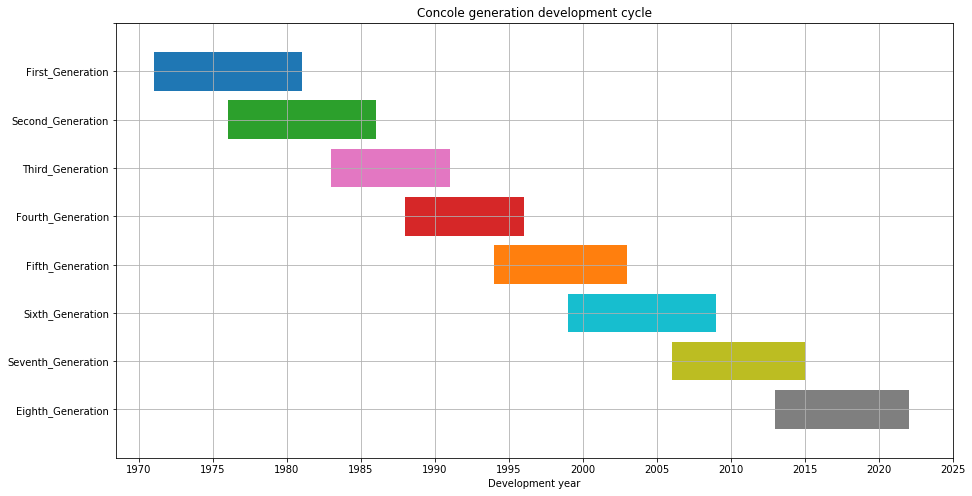

In [26]:
display(df_console_sale.groupby(['Generation','platform','Released_date','Global'])['Console_type'].value_counts()
 .unstack().fillna(0).sort_values('Released_date',ascending=True))

#---------------------------------------------------------------------------------#
#Borken bar ref:https://matplotlib.org/gallery/lines_bars_and_markers/broken_barh.html
fig, ax = plt.subplots(figsize=(15,8))
ax.broken_barh([(1971, 10)], (53, 4), facecolors='tab:blue')
ax.broken_barh([(1976, 10)], (48, 4), facecolors='tab:green')
ax.broken_barh([(1983, 8)], (43, 4), facecolors='tab:pink')
ax.broken_barh([(1988, 8)], (38, 4), facecolors='tab:red')
ax.broken_barh([(1994, 9)], (33, 4), facecolors='tab:orange')
ax.broken_barh([(1999, 10)], (28, 4), facecolors='tab:cyan')
ax.broken_barh([(2006, 9)], (23, 4), facecolors='tab:olive')
ax.broken_barh([(2013, 9)], (18, 4), facecolors='tab:gray')

ax.set_ylim(15, 60)
ax.set_xticks(np.arange(1970,2030,5))
ax.set_xlabel('Development year')
ax.set_yticks(np.arange(20,65,5))
ax.set_yticklabels(['Eighth_Generation', 'Seventh_Generation','Sixth_Generation','Fifth_Generation',
                   'Fourth_Generation','Third_Generation','Second_Generation','First_Generation'], size=10)
ax.grid(True)
ax.set_title('Concole generation development cycle')

plt.show()

<p>The table output gives a general summary of the concole evluation from the First generation since 1972 up to current Eighth generation within more than 40 years development history. 
    
Although the first video games appeared in early 1950s, it required massive computer connected to vector display intead of analog television to play the game. The concept of 'Home video game' was introduce in 1951 by <a href="https://en.wikipedia.org/wiki/Ralph_H._Baer"><b>"Ralph H. Baer"</b></a> , he also design servals video game console models in 1960 and one of the design named 'Brown Box' which become the prototype of <a href="https://en.wikipedia.org/wiki/Magnavox_Odyssey"><b>Magnavox Odyssey</b></a>  the first home video console in 1972.
    
Each console life cycyle will keep around 5-6 years until it time move to next generation     

The term Handheld was first appared in fourth genenration the concept of playing video game anywhere anytime not just significant evluation in game industry but also heaveliy influence other business industry such as moblie phone, one of the most successful example can be seen form <a href="https://en.wikipedia.org/wiki/Snake_(video_game_genre)"><b>"Nokia Snake game"</b></a> in 1996

<h3>4.1-2 Publisher console release based on generation 

In [27]:
console_sale_generation= df_console_sale.groupby('Generation')['Publisher'].value_counts().unstack().fillna(0)
console_sale_generation

Publisher,3DO,Atari,BANDAI,Magnavox,Microsoft,NEC,Nintendo,SEGA,SNK,Sony
Generation,,,,,,,,,,
First_Gen,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Second_Gen,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
Third_Gen,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Fourth_Gen,1.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,1.0,0.0
Fifth_Gen,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,1.0
Sixth_Gen,0.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,2.0
Seventh_Gen,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,2.0
Eighth_Gen,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


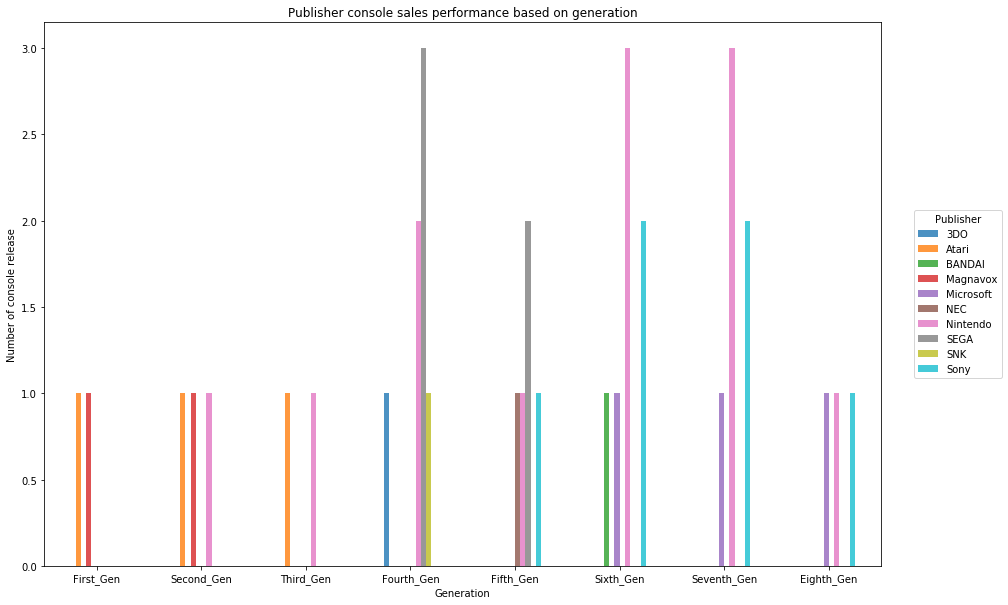

In [28]:
ax = console_sale_generation.plot(kind='bar', alpha=0.8,width=0.5,figsize=(15,10), rot=0)
ax.set_title('Publisher console sales performance based on generation')
ax.set_ylabel('Number of console release')
ax.legend(loc='center right', title ='Publisher', bbox_to_anchor=(1.15,0.5))

<p>There are total 10 console publisher in the past 8 generations, in the modern world some of the publisher are more well knowed as biggest software and entertainment company such as <b>Microsoft</b> and <b>Sony</b>.
  
Console game as a new concept of entertainment product it can only be accept by small group of consumer therefore the first three generation may consider as the "Stone Age" for console development, only few publisher involves console industry during the first three generation and each of them only release one product within the time.
     
The 'Golden Time" of console industry are between fourth and sixth generation as more publisher try to open up their console market, whether or not these new competitor has any of game industry relate experience previously. Some of the publisher with three product release within each generation not only emphasize their ambition to successed but also accelerate new console technology development.
    
From seventh up to eighth generation the competition are only between <b>Microsoft</b>, <b>Sony</b> and <b>Nintendo</b>. People on the internet would perfer describe the relationship between these three biggest console pubilsher as <b>Console Wars</b>       
    
    

<h2>4.1-3 Units sales performance 

<p>Let's take look how each generation console sales number performance 

In [29]:
df_console_sale.groupby('Generation')['Global'].sum()

Generation
First_Gen        0.50
Second_Gen      32.64
Third_Gen       66.21
Fourth_Gen     213.17
Fifth_Gen      155.85
Sixth_Gen      522.69
Seventh_Gen    381.09
Eighth_Gen     219.66
Name: Global, dtype: float64

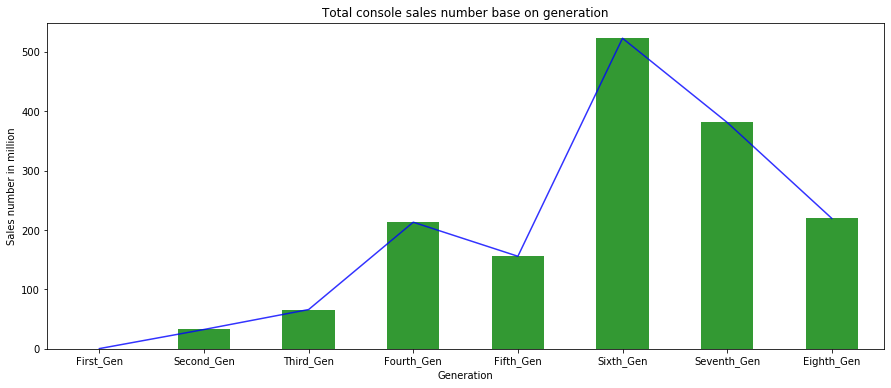

In [30]:
gen_total_sale=df_console_sale.groupby('Generation')['Global'].sum()
#vertical bar chart for console total Global sale base on each generation 
ax1 = gen_total_sale.plot(kind='bar', alpha=0.8,width=0.5,figsize=(15,6), rot=0, color='g')
ax1.set_title('Total console sales number base on generation')
ax1.set_xlabel('Generation ', size=10)
ax1.set_ylabel('Sales number in million', size=10)

ax2 = gen_total_sale.plot(alpha=0.8,figsize=(15,6) ,color='b')

<p>Based on chart we can cleary see that before seventh generation the overall console unit sales are significant increase each time with one exception "Fifth_Gen (will discuss the reason in section 4.1-4)" which demonstrate how video game market from small percentage of consumer growth up to globalize in the past 20 years. 
    
Particularly in Sixth_Gen with more than 500 million unit sold has already become one of the greatest achievement in video history and it sales record may not easily to be able surpass for the future generation.

The sales number from Seventh_Gen up to Eighth_Gen seems likes has been slowly decrease may need to consider serval elements:
        <ul><li>First obvisous reason is new business competitor. The rise of PC and Mobile game may potentially impact the home-console industry and take over some of their market</li>
        <li>Age-group customer lost between generation transformation may be the second reason. As each console generation development cycle is between 5-6 years, during the time gap most of the customer has alrady move  forward to their next life stage, by the time new console release they may no longer have time or reason to participate </li>
        <li>Uncreative and less improvement may be last reason. Customer are not willing purchase same product twice if there is no significant difference which is a nature human being</li>
    

<h3>4.1-4 Platform marketing performance on each generation 

<p>In order to have fair comparison between each platfrom we will group them by their generation 

In [31]:
#Extract each generation of data frame 
gen_1 = df_console_sale[df_console_sale['Generation']=='First_Gen']
gen_2 = df_console_sale[df_console_sale['Generation']=='Second_Gen']
gen_3 = df_console_sale[df_console_sale['Generation']=='Third_Gen']
gen_4 = df_console_sale[df_console_sale['Generation']=='Fourth_Gen']
gen_5 = df_console_sale[df_console_sale['Generation']=='Fifth_Gen']
gen_6 = df_console_sale[df_console_sale['Generation']=='Sixth_Gen']
gen_7 = df_console_sale[df_console_sale['Generation']=='Seventh_Gen']
gen_8 = df_console_sale[df_console_sale['Generation']=='Eighth_Gen']


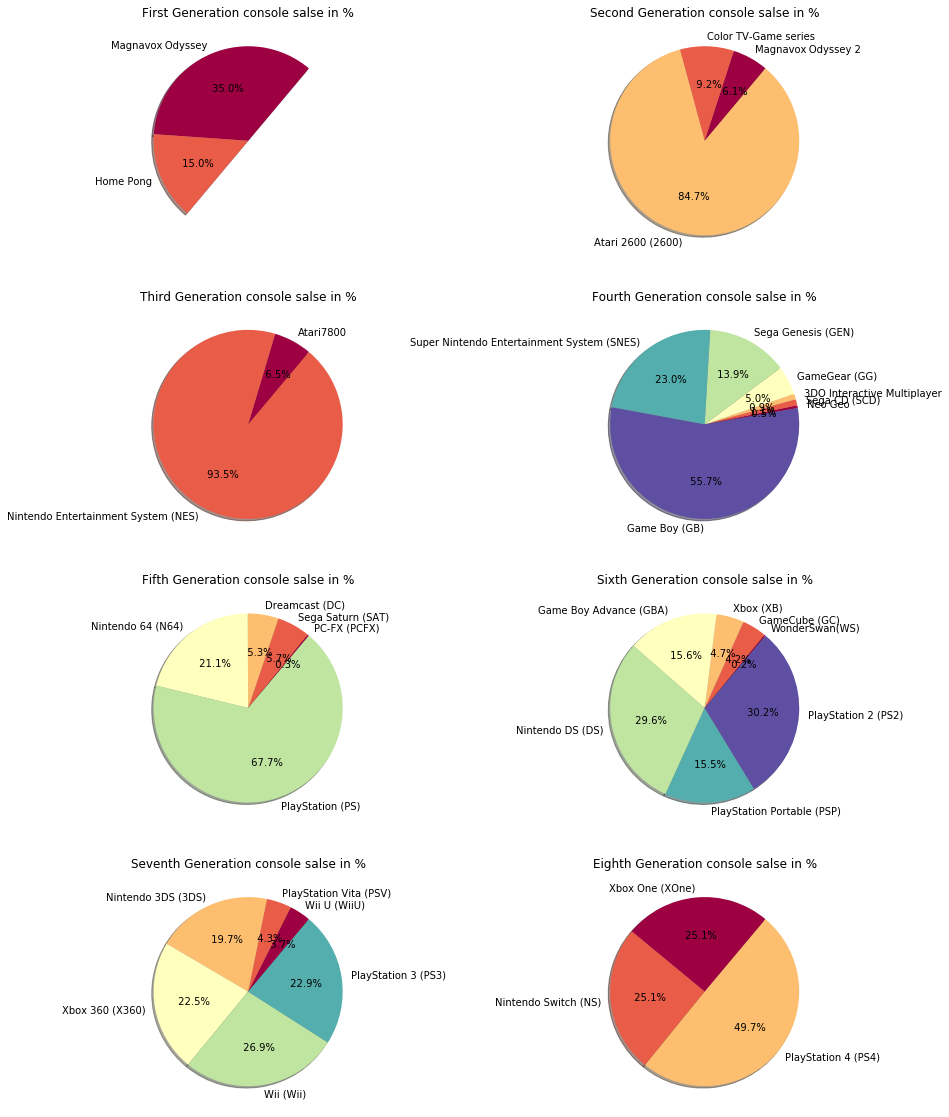

In [32]:
# Make figure and axes
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(15,20))
colors = np.linspace(0, 1, gen_4.platform.size)
# A standard pie plot

ax[0,0].pie(gen_1.Global, labels=gen_1.platform, autopct='%5.1f%%', colors=cm.Spectral(colors), shadow=True, 
startangle=50)
ax[0,0].set_title('First Generation console salse in %')

ax[0,1].pie(gen_2.Global, labels=gen_2.platform, autopct='%5.1f%%', colors=cm.Spectral(colors), shadow=True, 
startangle=50)
ax[0,1].set_title('Second Generation console salse in %')

ax[1,0].pie(gen_3.Global, labels=gen_3.platform, autopct='%5.1f%%',  colors=cm.Spectral(colors), shadow=True, 
startangle=50)
ax[1,0].set_title('Third Generation console salse in %')

ax[1,1].pie(gen_4.Global, labels=gen_4.platform, autopct='%5.1f%%',  colors=cm.Spectral(colors), shadow=True, 
startangle=10)
ax[1,1].set_title('Fourth Generation console salse in %')

ax[2,0].pie(gen_5.Global, labels=gen_5.platform, autopct='%5.1f%%',  colors=cm.Spectral(colors), shadow=True, 
startangle=50)
ax[2,0].set_title('Fifth Generation console salse in %')

ax[2,1].pie(gen_6.Global, labels=gen_6.platform, autopct='%5.1f%%',  colors=cm.Spectral(colors), shadow=True, 
startangle=50)
ax[2,1].set_title('Sixth Generation console salse in %')

ax[3, 0].pie(gen_7.Global, labels=gen_7.platform, autopct='%5.1f%%',  colors=cm.Spectral(colors), shadow=True, 
startangle=50)
ax[3,0].set_title('Seventh Generation console salse in %')

ax[3, 1].pie(gen_8.Global, labels=gen_8.platform, autopct='%5.1f%%',  colors=cm.Spectral(colors), shadow=True, 
startangle=50)
ax[3,1].set_title('Eighth Generation console salse in %')

plt.show()

<p>There are serval results we will deeply investigate let break them by parts:

The first generation only has two types of platform and their sales performance may not inpressive compare to later generation but still they are undeniableare the foundation for future console.
    
Atari 2600 has dominate video game market in second generation with 84.7% global sales easily surpass other competitor,before game industry move to next generation there are more than 70% of American family owns Atari console according to US scientific research report. However this achievement might be the last one Atari can accomplish.
    
Atari 7800 failed to inherit the success of his predecessors, one of the most devastated event well known as 
 <a href="https://en.wikipedia.org/wiki/Video_game_crash_of_1983"><b>Video game crash of 1983</b></a> or <a href="https://en.wikipedia.org/wiki/Video_game_crash_of_1983"><b>Atari shock</b></a> destory the entire western game industry. The western game industry has been through five generation of "Dark Age" , during the time Japanese publisher has quickly take over the market until <b>Microsoft</b>'s <b>Xbox</b> franchise appears
    
Nintendo takes adventage during third and fourth generation by releaseing three most well know consoles <b>NES</b>, <b>SNES</b> and <b>Game Boy</b> in history. Many of famous video games are first appear on <b>NES</b> and <b>SNES</b> such as <b>"Super Mario, Pokémon, Final Fantasy, legend of zelda"</b> etc, these games may not only be define as game of the generation but also heavely influence many people's childhood and furture game development.
<b>Game Boy</b> is first handheld video console and the concept of portable gaming has been introduce with 55.7% market sales perfromance prove the popularity of this new technology.   
    
<b>Sony</b>'s <b>Playstation</b> franchise first time indroduce in fifth genearion, this appearance has almost rewrite the entire game history in the past, <b>"Playstation 1"</b> has successfully break limitation of "2D game" on console. Unlike previous console and other competitor use traditional <b>cartridge</b> as game media, <b>"Playstation 1 </b> has step forward choose <b>CD-ROM</b> as their game media. Three of most significant advantage of <b>CD-ROM</b> compare <b>cartridge</b>  are:
    <ul><li>Cost efficient</li>
    <li>Memory input capacity, allow game developer to store more detials into their games and slightly to achieve "3D game" on console</li>
    <li>Output processing speed, improve overall game performance</li></ul>
Because of <b>Playstation 1 </b> revolutionary design and gameplay it has become best selling console in fifth generation, it also heavility impact other competitor reduce their console sales performance
        
From sixth generation up to current time , three biggest console publisher still exist are <b>Microsoft</b>, <b>Sony</b> and <b>Nintendo</b>. Each of them have proven their console market potential over the past few years ,  they also learn valueable experience from thier previous product whether is success or failure. Although <b>Sony</b>'s <b>Playstation 4</b> undeniably win the current generation console war, it's still impossible to perdict who will be the winner in upcoming generation. 
        

<h3>4.1-5 Platform sales number 

In [33]:
display(df_console_sale.groupby(['platform'])['Global'].sum().sort_values(ascending=False))

platform
PlayStation 2 (PS2)                           157.68
Nintendo DS (DS)                              154.90
Game Boy (GB)                                 118.69
PlayStation 4 (PS4)                           109.28
PlayStation (PS)                              105.50
Wii (Wii)                                     102.50
PlayStation 3 (PS3)                            87.41
Xbox 360 (X360)                                85.80
Game Boy Advance (GBA)                         81.51
PlayStation Portable (PSP)                     81.09
Nintendo 3DS (3DS)                             75.20
Nintendo Entertainment System (NES)            61.91
Xbox One (XOne)                                55.19
Nintendo Switch (NS)                           55.19
Super Nintendo Entertainment System (SNES)     49.10
Nintendo 64 (N64)                              32.93
Sega Genesis (GEN)                             29.54
Atari 2600 (2600)                              27.64
Xbox (XB)                            

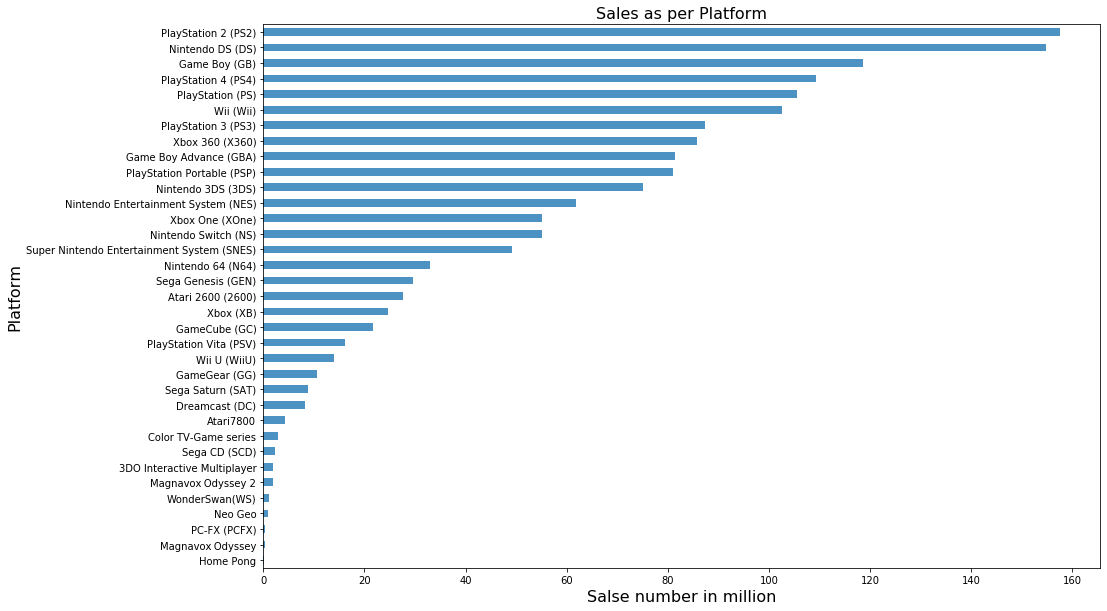

In [34]:
console_sale_test= df_console_sale.groupby(['platform'])
val =console_sale_test['Global'].aggregate(np.mean).sort_values()
val.plot(kind='barh', alpha=0.8,width=0.5,figsize=(15,10), rot=0)
plt.xlabel('Salse number in million',fontsize=16)
plt.ylabel('Platform',fontsize=16)
plt.title('Sales as per Platform',fontsize=16)

plt.show()

<p>The top 10 best selling console are majority come from <b>Sony</b> and <b>Nintendo</b>, over six platforms sales exceed more than 100 million units.

According to Guinness World Record <b>Playstation</b> has been certified as the best-selling home video game console brand ever, with over 450 million units sold across the original <b>PlayStation, PS2, PS3 and PS4</b>. 

From previous section we have discover the most units sale are come from fifth, sixth and seventh generation even through the number seems like decrease since seventh gen. To answer the question why sales number has been decrease  in the past two generation we need to combine some of history event.

Before sixth generation, all the consoles are design for one purpose only which is gaming and there are three keys roles in console game business: 
<ul><li><b>Game developer</b> has to based on the current hardware limitation and provide the best quality of single player games release to mutiple platforms
   <li><b>Console publisher</b> they can gain profit by selling their console unit, exclusive gaming and share profit income with game developer,  
    <li><b>Consumer</b> have ability to choose console platform and types of games

Once the consumer purchase certain types of platform and games which means they have the permission to access and modify their product, game developer and console publisher do not have the right to reclaim their products from consumer. This policy give consumer 100% ownership and freedom how to use treat their own goods may destory some of game developer business income, for example consumer can modify or jailbreak their console another named <a href="https://www.sciencedirect.com/book/9781931836319/game-console-hacking"><b>Hacked console</b></a> and use games source code on internet to play the full game without paying full price or even take legal action. The <b>Hacked console</b> appearance around the world makes console become more affordable and helps large amount of people can experience video for the first time, this consequence has significantly push overall console sales number.</ul>

The online multiplayer on console become reality when <b>Xbox 360</b> and  <b>PS3</b> officially  introduce their own game servers <a href="https://en.wikipedia.org/wiki/Xbox_Live"><b>Xbox live</b></a>  and <a href="https://en.wikipedia.org/wiki/PlayStation_Network"><b>PSN</b></a> in seventh generation. From this time the game community has been divide into two groups, one group of gamer would like to support genuine publisher and developer by paying full price and experience online multiplayer the other group of gamer are opposite. As result there are less people would like to purchase new console when they cannot fully experience functionality of new console with less spend.
    

    

<h3>4.1-6 Home base console vs handle which one is more popular?

<p>To begin with, we'll only focus on the generation which contains handle console


In [35]:
#Thoes are the generation we be used
g4_con_handle= gen_4.groupby('Console_type')['Global'].sum()
g6_con_handle= gen_6.groupby('Console_type')['Global'].sum()
g7_con_handle= gen_7.groupby('Console_type')['Global'].sum()
g8_con_handle= gen_8.groupby('Console_type')['Global'].sum()

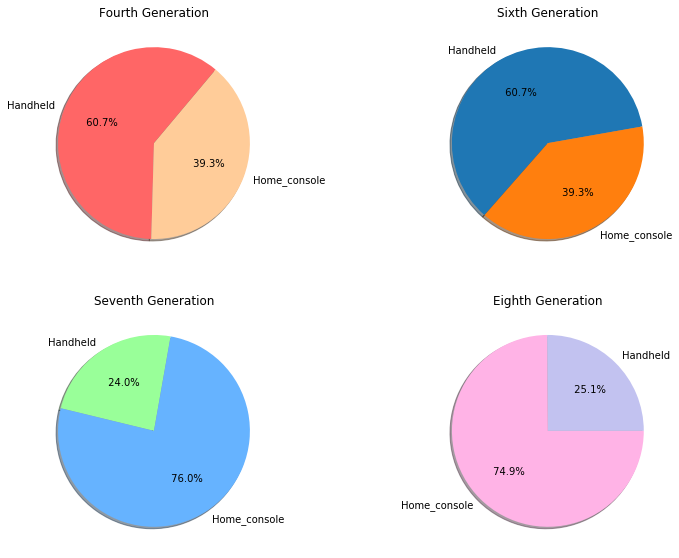

In [36]:
gridsize = (3, 3)
fig = plt.figure(figsize=(20, 15))


ax1 = plt.subplot2grid(gridsize, (0, 0))
ax1.pie(g4_con_handle ,labels=g4_con_handle.index, autopct='%5.1f%%', colors=['#ff6666', '#ffcc99'],shadow=True, 
startangle=50)
ax1.set_title('Fourth Generation')

ax2 = plt.subplot2grid(gridsize, (0, 1))
ax2.pie(g6_con_handle ,labels=g6_con_handle.index, autopct='%5.1f%%', shadow=True, 
startangle=10)
ax2.set_title('Sixth Generation')

ax3 = plt.subplot2grid(gridsize, (1, 0))
ax3.pie(g7_con_handle ,labels=g7_con_handle.index, autopct='%5.1f%%', colors=['#99ff99', '#66b3ff'], shadow=True, 
startangle=80)
ax3.set_title('Seventh Generation')

ax4 = plt.subplot2grid(gridsize, (1, 1))
ax4.pie(g8_con_handle ,labels=g8_con_handle.index, autopct='%5.1f%%', colors=['#c2c2f0','#ffb3e6'], shadow=True, 
startangle=0)
ax4.set_title('Eighth Generation')

plt.show()

<p>Handle console sales number in fourth and sixth generation with surprisingly exactly same 60.7% overall performance is the best result it can achieves. From seventh up to eighth generation the sales number are quite approach to each other, this result is predictable and evidence can refer to rise of Mobile gaming over the past few years may steal some of the handle game market.   

<h3>4.1-7 Console sale and their publisher performance on each region 

In [37]:
df_console_sale.groupby('Generation')[['North_America','Europe','Japan','Rest_of_world']].sum().agg(['mean','std'])

,North_America,Europe,Japan,Rest_of_world
mean,82.892500,58.997500,36.181250,18.286250
std,68.034574,59.868276,33.475533,22.093479


,North_America,Europe,Japan,Rest_of_world
Generation,,,,
First_Gen,0.00,0.00,0.00,0.00
Second_Gen,23.54,3.35,0.00,0.75
Third_Gen,37.79,8.30,19.35,0.77
Fourth_Gen,88.44,59.82,55.00,4.69
Fifth_Gen,66.62,40.47,35.18,10.18
Sixth_Gen,201.16,164.68,98.58,58.00
Seventh_Gen,158.19,124.48,58.75,38.81
Eighth_Gen,87.40,70.88,22.59,33.09


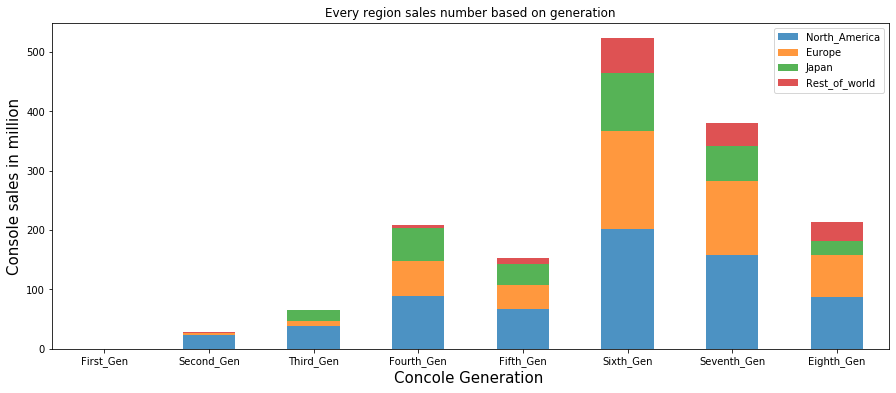

In [38]:
#Each generation total sales number based on different regions
gen_region=df_console_sale.groupby('Generation')[['North_America','Europe','Japan','Rest_of_world']].sum()
display(gen_region)
ax1 = gen_region.plot(kind='bar',alpha=0.8,figsize=(15,6),rot=0,stacked=True)
ax1.set_title('Every region sales number based on generation')
ax1.set_xlabel('Concole Generation ', size=15)
ax1.set_ylabel('Console sales in million', size=15)
plt.show()

<p>North America and Europe generates much more sales number compare to Japan and the Rest of world indicates that console game is more popular in western country and most of the game players come from these two regions.

,North_America,Europe,Japan,Rest_of_world
Publisher,,,,
3DO,0.00,0.00,0.00,0.00
Atari,27.84,3.35,0.00,0.75
BANDAI,0.00,0.00,1.12,0.00
Magnavox,0.00,0.00,0.00,0.00
Microsoft,95.48,44.87,2.30,17.29
NEC,0.00,0.00,0.00,0.00
Nintendo,327.62,213.28,182.37,43.24
SEGA,28.11,14.65,13.41,1.01
SNK,0.00,0.00,0.00,0.00


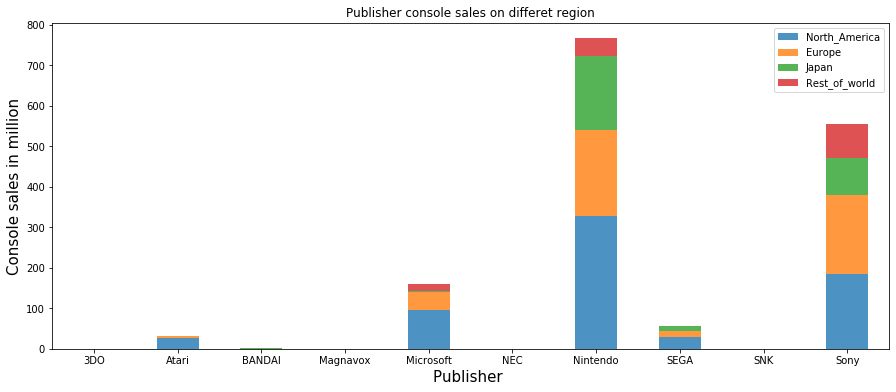

In [39]:
#Each publisher sales number performance based on different regions
pub_region=df_console_sale.groupby('Publisher')[['North_America','Europe','Japan','Rest_of_world']].sum()
display(pub_region)
ax2 = pub_region.plot(kind='bar',alpha=0.8,figsize=(15,6),rot=0,stacked=True)
ax2.set_title('Publisher console sales on differet region')
ax2.set_xlabel('Publisher ', size=15)
ax2.set_ylabel('Console sales in million', size=15)
plt.show()

<p>Since most of the publisher do not contain the value from certain region, therefore we only foucus on the publisher whose include input across all the region.
    
    

<p>Refering from previous section <b>Nintendo</b> and <b>Sony</b> we already know that they have taken top spot of console gaming, <b>Microsoft</b> on the other hand may have long way try to catch up his competitors. Another interesting thing we can notice from <b>Microsoft</b> is the sales number on Japan region almost less than 5%, this may refer after Japan video market suffer the horrible event <b>Atari shock 1983</b> it nearly impossible for any new western publisher open up their video game business in Japan.    

<h2>4.2 Console and PC gaming  

In [40]:
df_steam_sale.head()

,ResponseName,ReleaseDate,SteamSpyOwners,CategorySinglePlayer,CategoryMultiplayer,CategoryCoop,CategoryMMO,CategoryInAppPurchase,CategoryIncludeSrcSDK,CategoryIncludeLevelEditor,...,table_Adventure,table_Strategy,table_RPG,table_Simulation,table_Sports,table_Racing,table_MassivelyMultiplayer,Game_Genre,table_SinglePlayer,table_Multiplayer
0,Counter-Strike,2000-11-01,13033334,False,True,False,False,False,False,False,...,,,,,,,,Action,,Multiplayer
1,Team Fortress Classic,1999-04-01,5399140,False,True,False,False,False,False,False,...,,,,,,,,Action,,Multiplayer
2,Day of Defeat,2003-05-01,7621102,False,True,False,False,False,False,False,...,,,,,,,,Action,,Multiplayer
3,Deathmatch Classic,2001-06-01,7498965,False,True,False,False,False,False,False,...,,,,,,,,Action,,Multiplayer
4,Half-Life: Opposing Force,1999-11-01,5399499,True,True,False,False,False,False,False,...,,,,,,,,Action,SinglePlayer,Multiplayer


<p>"Software comes from heaven when you have good hardware." ~ Ken Olsen, the same quote can also apply for video game. In this section we will mainly focus on the games themselves by comparing their category, genre and potential customer etc across two standard platfrom PC and console in order gain any of sophisticated result.

<h3>4.2-1 Number of game release on console and PC each year

<p> First let take a look for overall number of games release on both platforms each years

In [41]:
df_steam_sale['date_year']=df_steam_sale.ReleaseDate.dt.year
df_steam_sale['date_month']=df_steam_sale.ReleaseDate.dt.month_name()

In [42]:
print('Number of PC game realse each year')
display(df_steam_sale['date_year'].sort_values(ascending=False).value_counts())
print('\nNumber of Console game release each year')
display(df_console_game.Year.sort_values(ascending=False).value_counts())

Number of PC game realse each year


2016    5335
2015    3006
2014    1744
2013     550
2012     392
2009     369
2010     314
2011     305
2008     187
2007     117
2006      79
2017      60
2004       8
2005       6
2001       4
2003       3
1999       2
2000       2
2019       1
1997       1
1998       1
Name: date_year, dtype: int64


Number of Console game release each year


2009    1431
2008    1428
2010    1259
2007    1202
2011    1139
2006    1008
2005     941
2002     829
2003     775
2004     763
2012     657
2015     614
2014     582
2013     546
2001     482
1998     379
2000     349
2016     344
1999     338
1997     289
0        271
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1984      14
1985      14
1980       9
2017       3
2020       1
Name: Year, dtype: int64

<p>The concole game has much longer development history compare to PC game.

In 2016 PC has release more than 5000 games this number is quite huge compare with the highest number on console which is 1431

<h3>4.2-2 Popular Season for game release 

In [43]:
df_steam_sale = df_steam_sale.drop_duplicates()

In [44]:
game=df_steam_sale.groupby('date_month')['date_year'].value_counts().sort_values().unstack(0).fillna(0)
game

date_month,April,August,December,February,January,July,June,March,May,November,October,September
date_year,,,,,,,,,,,,
1997,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1999,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
2001,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0
2003,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2004,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,3.0,0.0,0.0
2005,1.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0
2006,1.0,19.0,5.0,2.0,0.0,8.0,1.0,1.0,3.0,7.0,15.0,4.0


<p>Note: Since the dataset does not contain the complete information，we will just irgone the outlier from the output

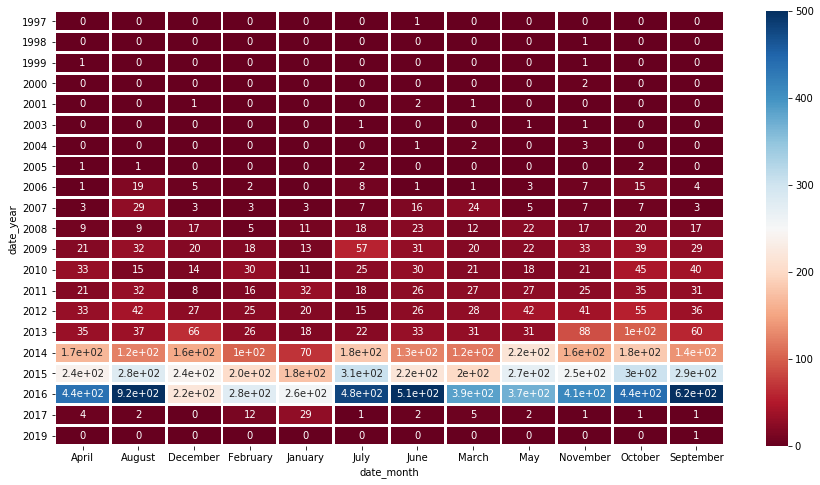

In [45]:
plt.figure(figsize=(15, 8))
sns.heatmap(game,cmap='RdBu',linewidths=2,vmin=0,vmax=500,linewidth=1.9,annot=True)

<p>It undeniably that a well organized release date for game publisher can help accelerate their stock market and avoid the competition from the others
    
August, June and September are the most popular seasons for game release, one addtional information we can spot on the output is from 2014 the overall game release on PC is significant increase compare to previous time  

<h3>4.2-3 Type of game release on each year 

<p>Every genres of games have specific targeted audience for instance: some player would love a game with fascinating story telling, others may prefer a game with high tension competitive multiplayer mode. The audience perspective of games have stong impact on certain types of games release on different platforms

<p>First let take look at some genres games on PC market performance 

In [46]:
Action = df_steam_sale[df_steam_sale['table_Action']=='Action'].groupby('date_year').size()

Indie = df_steam_sale[df_steam_sale['table_Indie']=='Indie'].groupby('date_year').size()

Adventure = df_steam_sale[df_steam_sale['table_Adventure']=='Adventure'].groupby('date_year').size()

Strategy = df_steam_sale[df_steam_sale['table_Strategy']=='Strategy'].groupby('date_year').size()

RPG = df_steam_sale[df_steam_sale['table_RPG']=='RPG'].groupby('date_year').size()

Simulation = df_steam_sale[df_steam_sale['table_Simulation']=='Simulation'].groupby('date_year').size()

Sports = df_steam_sale[df_steam_sale['table_Sports']=='Sports'].groupby('date_year').size()

Racing = df_steam_sale[df_steam_sale['table_Racing']=='Racing'].groupby('date_year').size()

MassivelyMultiplayer = df_steam_sale[df_steam_sale['table_MassivelyMultiplayer']=='MassivelyMultiplayer'].groupby('date_year').size()


Text(0.5, 1.0, 'MassivelyMultiplayer')

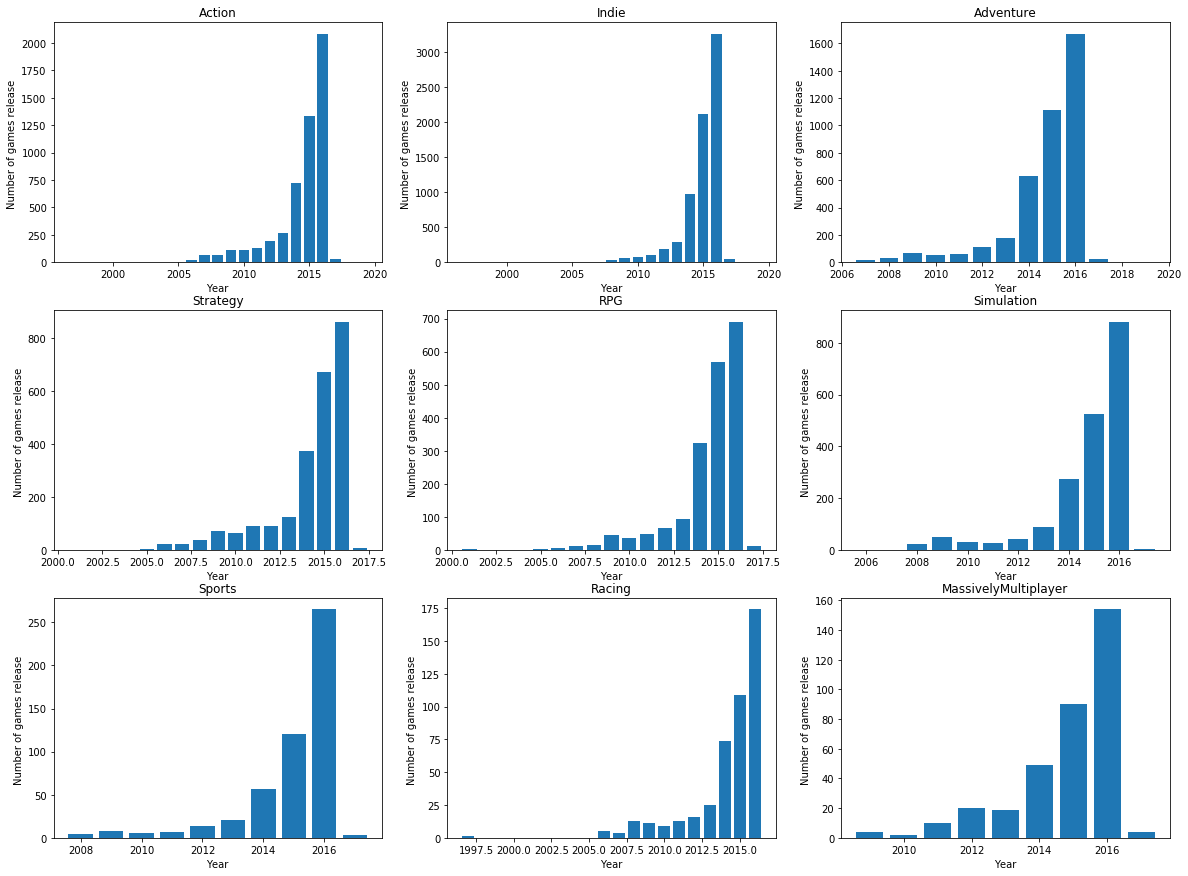

In [47]:
gridsize = (3, 3)
fig = plt.figure(figsize=(20, 15))

ax1 = plt.subplot2grid(gridsize, (0, 0))
ax1.bar(Action.index ,height=Action.values)
ax1.set_xlabel('Year')
ax1.set_ylabel ('Number of games release ')
ax1.set_title('Action')

ax2 = plt.subplot2grid(gridsize, (0, 1))
ax2.bar(Indie.index ,height=Indie.values)
ax2.set_xlabel('Year')
ax2.set_ylabel ('Number of games release ')
ax2.set_title('Indie')

ax3 = plt.subplot2grid(gridsize, (0, 2))
ax3.bar(Adventure.index ,height=Adventure.values)
ax3.set_xlabel('Year')
ax3.set_ylabel ('Number of games release ')
ax3.set_title('Adventure')

ax4 = plt.subplot2grid(gridsize, (1, 0))
ax4.bar(Strategy.index ,height=Strategy.values)
ax4.set_xlabel('Year')
ax4.set_ylabel ('Number of games release ')
ax4.set_title('Strategy')

ax5 = plt.subplot2grid(gridsize, (1, 1))
ax5.bar(RPG.index ,height=RPG.values)
ax5.set_xlabel('Year')
ax5.set_ylabel ('Number of games release ')
ax5.set_title('RPG')

ax6 = plt.subplot2grid(gridsize, (1, 2))
ax6.bar(Simulation.index ,height=Simulation.values)
ax6.set_xlabel('Year')
ax6.set_ylabel ('Number of games release ')
ax6.set_title('Simulation')

ax7 = plt.subplot2grid(gridsize, (2, 0))
ax7.bar(Sports.index ,height=Sports.values)
ax7.set_xlabel('Year')
ax7.set_ylabel ('Number of games release ')
ax7.set_title('Sports')

ax8 = plt.subplot2grid(gridsize, (2, 1))
ax8.bar(Racing.index ,height=Racing.values)
ax8.set_xlabel('Year')
ax8.set_ylabel ('Number of games release ')
ax8.set_title('Racing')

ax9 = plt.subplot2grid(gridsize, (2, 2))
ax9.bar(MassivelyMultiplayer.index ,height=MassivelyMultiplayer.values)
ax9.set_xlabel('Year')
ax9.set_ylabel ('Number of games release ')
ax9.set_title('MassivelyMultiplayer')



<p> We can immediately each graphs are look similar in terms of number of games release base on time which is a good sights indicated that the overall PC game industry has potentially growth over the past years and the number of games release will likely keep increase in the future.
    
Action, Indie and Adventure are three biggest game market on PC platfrom ,each genres have overall more than 3000 games release. 

<p>Now let back to console game 

In [48]:
console_gen_year=df_console_game.groupby('Genre')['Year'].value_counts().unstack().fillna(0)
console_gen_year

Year,0,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020
Genre,,,,,,,,,,,,,,,,,,,,,
Action,63.0,1.0,25.0,18.0,7.0,1.0,2.0,6.0,2.0,2.0,...,272.0,226.0,239.0,266.0,148.0,186.0,255.0,119.0,1.0,0.0
Adventure,10.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,141.0,154.0,108.0,58.0,60.0,75.0,54.0,34.0,0.0,0.0
Fighting,12.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,...,53.0,40.0,50.0,29.0,20.0,23.0,21.0,14.0,0.0,0.0
Misc,29.0,4.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,207.0,201.0,184.0,38.0,42.0,41.0,39.0,18.0,0.0,0.0
Platform,10.0,0.0,3.0,5.0,5.0,1.0,4.0,6.0,2.0,4.0,...,29.0,31.0,37.0,12.0,37.0,10.0,14.0,10.0,0.0,0.0
Puzzle,11.0,0.0,2.0,3.0,1.0,3.0,4.0,0.0,0.0,1.0,...,79.0,45.0,43.0,11.0,3.0,8.0,6.0,0.0,0.0,0.0
Racing,23.0,0.0,1.0,2.0,0.0,3.0,0.0,1.0,0.0,1.0,...,84.0,57.0,65.0,30.0,16.0,27.0,19.0,20.0,0.0,0.0
Role-Playing,17.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,...,103.0,103.0,95.0,78.0,71.0,91.0,78.0,40.0,2.0,0.0
Shooter,28.0,2.0,10.0,5.0,1.0,3.0,1.0,4.0,2.0,1.0,...,91.0,81.0,94.0,48.0,59.0,47.0,34.0,32.0,0.0,0.0


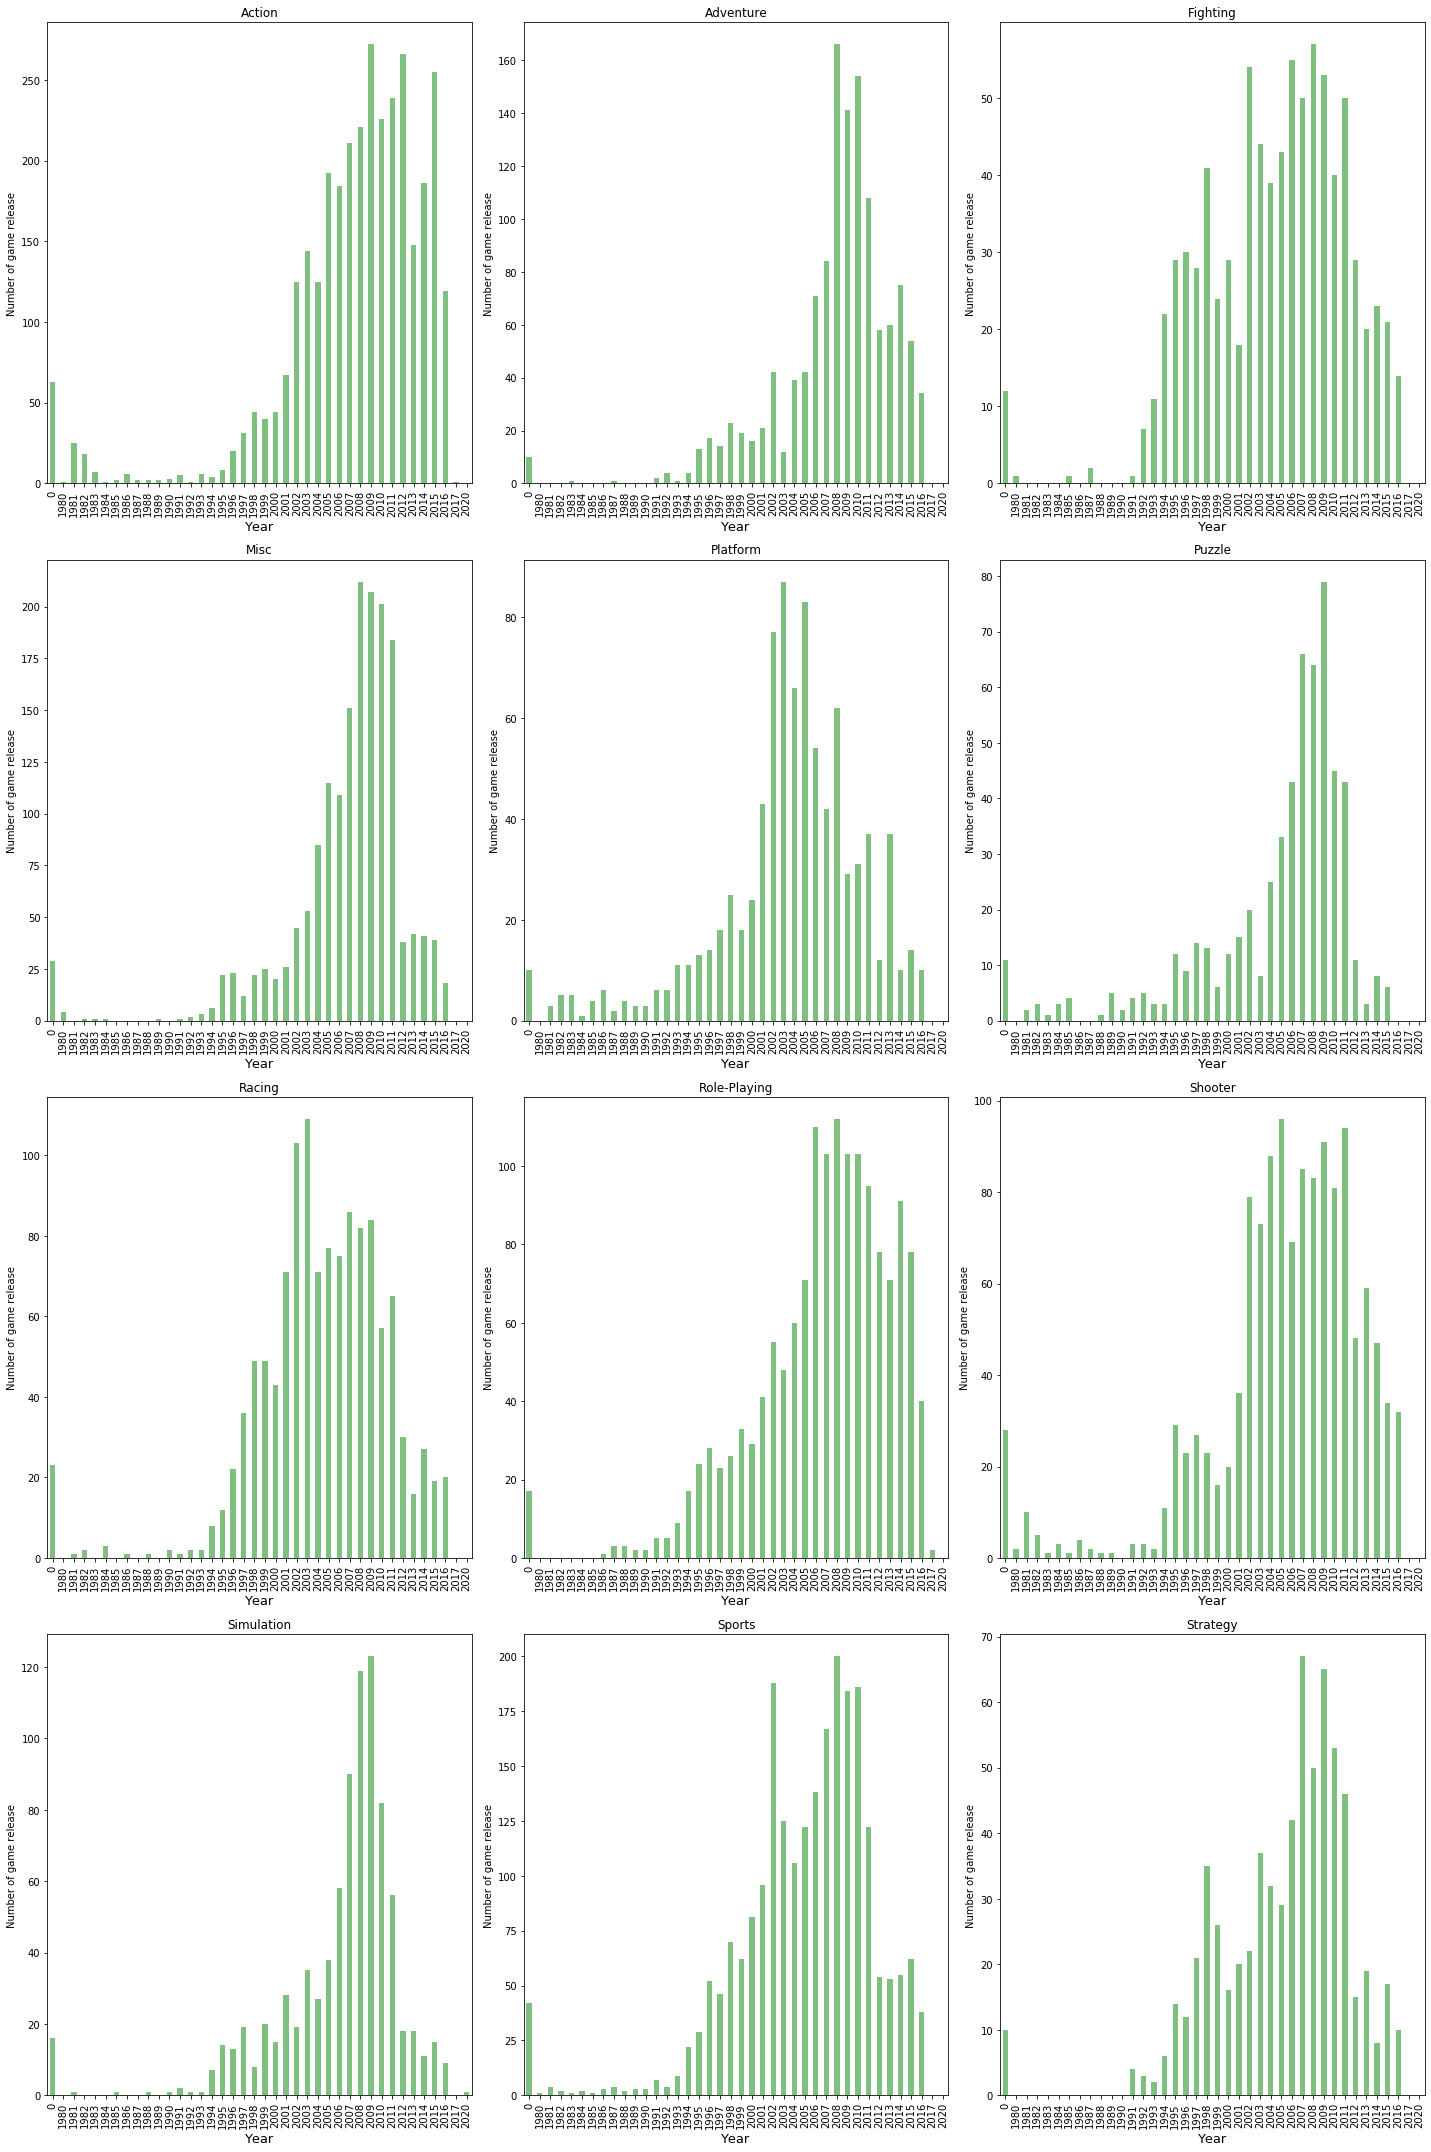

In [49]:
#Table output for Console game genre
category = console_gen_year.index.get_level_values("Genre").unique()
category = zip(range(0,len(category)),category)

fig, axes = plt.subplots(nrows=4, ncols=3,figsize=(20,30))

for i, title in category:
    xpos = int(math.floor(i / 3))
    ypos = i - (3 * xpos)
    ax = console_gen_year.xs(key=title).plot(kind="bar", ax=axes[xpos, ypos], title=title, color="green", alpha=0.5)
    ax.set_xlabel("Year",size=13)
    ax.set_ylabel("Number of game release",size=10)
    
fig.tight_layout()

<p>The dataset I choose for console platform may contains more genres information than PC as we can see from table above. 
    
Action and Adventure are once again have been prove their popularity on console as well which is similar outcome compare to PC platform.

Other than dataset incompleteness still the number of games release is slighty decrease recently, part of the reason may be consider there are less console sales issues as we have discuss in the section 4.1 Console-Hardware.    

<h3>4.2-4 How some of the common genre games sales number performance on both PC and Console 

In [50]:
#Transfering sales number of console dataset from million to digital format
df_console_game['sale_number']=(df_console_game.Global_Sales*1000000).astype('int64')
df_console_game.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,sale_number
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,82740000
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,40240000
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,35820000
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,33000000
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,31370000


<p>In order to make the comparison fairly we only select the common attributes from both dataset

In [51]:
df_console_game.Genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [52]:
print(f"Console contain relase date: {df_console_game.Year.unique()} \n\nSteam contain relase date:{df_steam_sale.date_year.unique()}")

Console contain relase date: [2006 1985 2008 2009 1996 1989 1984 2005 1999 2007 2010 2013 2004 1990
 1988 2002 2001 2011 1998 2015 2012 2014 1992 1997 1993 1994 1982 2003
 1986 2000    0 1995 2016 1991 1981 1987 1980 1983 2020 2017] 

Steam contain relase date:[2000 1999 2003 2001 1998 2004 2010 2005 2006 2007 2008 2009 2013 2011
 2012 2014 2015 2016 1997 2017 2019]


In [53]:
#Thoese are types of genres and datetime may need to eliminate  or include 
#Sports, Simulation, Strategy, Racing,Action, Adventure, RPG, Role-Playing
#2020,2019,1985,1996,1989,1984,1990,1988,0,1992,1997,1993,1994,1982,1986,1995,1991,1981,1980,1983

In [54]:
console_common_y=(df_console_game[(df_console_game.Year !=2020) & #Create a new function for common attribute on console 
                  (df_console_game.Year !=2019)&
                  (df_console_game.Year >=1998)])
                            

steam_common_y=(df_steam_sale[(df_steam_sale.date_year !=2019)]) #Create a new function for common attribute on PC
print(steam_common_y.date_year.unique())
print(console_common_y.Year.unique())

[2000 1999 2003 2001 1998 2004 2010 2005 2006 2007 2008 2009 2013 2011
 2012 2014 2015 2016 1997 2017]
[2006 2008 2009 2005 1999 2007 2010 2013 2004 2002 2001 2011 1998 2015
 2012 2014 2003 2000 2016 2017]


In [55]:
Action_con = console_common_y[(console_common_y.Genre =='Action')].groupby('Year')['sale_number'].sum()
Action_ste = steam_common_y[steam_common_y['table_Action']=='Action'].groupby('date_year')['SteamSpyOwners'].sum()

Simulation_con = console_common_y[(console_common_y.Genre =='Simulation')].groupby('Year')['sale_number'].sum()
Simulation_ste = steam_common_y[steam_common_y['table_Simulation']=='Simulation'].groupby('date_year')['SteamSpyOwners'].sum()

Strategy_con = console_common_y[(console_common_y.Genre =='Strategy')].groupby('Year')['sale_number'].sum()
Strategy_ste = steam_common_y[steam_common_y['table_Strategy']=='Strategy'].groupby('date_year')['SteamSpyOwners'].sum()

Racing_con = console_common_y[(console_common_y.Genre =='Racing')].groupby('Year')['sale_number'].sum()
Racing_ste = steam_common_y[steam_common_y['table_Racing']=='Racing'].groupby('date_year')['SteamSpyOwners'].sum()

Sports_con = console_common_y[(console_common_y.Genre =='Sports')].groupby('Year')['sale_number'].sum()
Sports_ste = steam_common_y[steam_common_y['table_Sports']=='Sports'].groupby('date_year')['SteamSpyOwners'].sum()

Adventure_con = console_common_y[(console_common_y.Genre =='Adventure')].groupby('Year')['sale_number'].sum()
Adventure_ste = steam_common_y[steam_common_y['table_Adventure']=='Adventure'].groupby('date_year')['SteamSpyOwners'].sum()

RPG_con = console_common_y[(console_common_y.Genre =='Role-Playing')].groupby('Year')['sale_number'].sum()
RPG_ste = steam_common_y[steam_common_y['table_RPG']=='RPG'].groupby('date_year')['SteamSpyOwners'].sum()


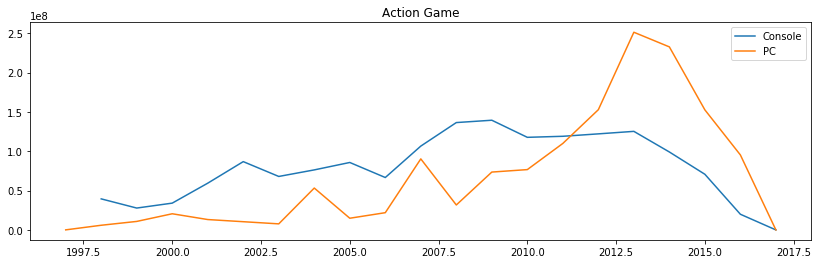

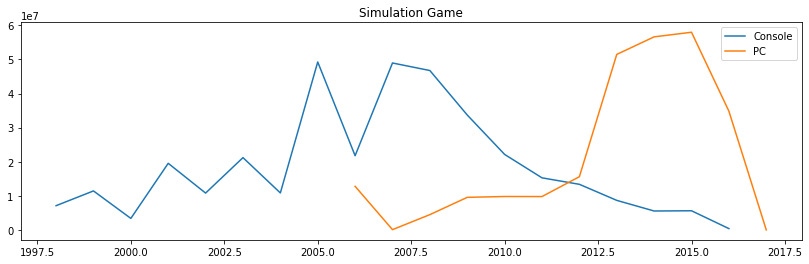

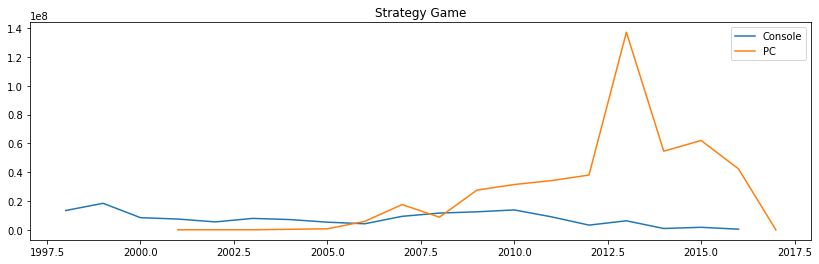

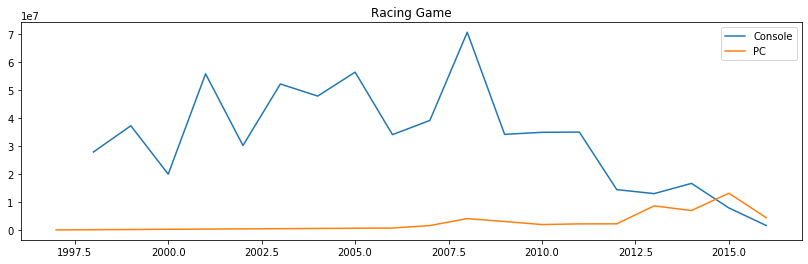

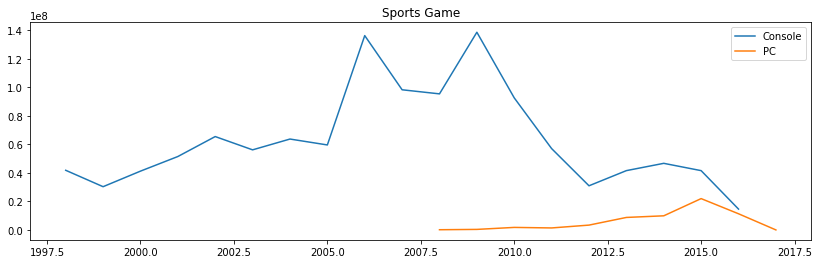

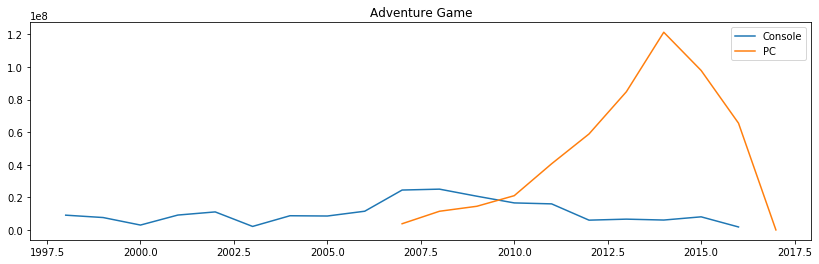

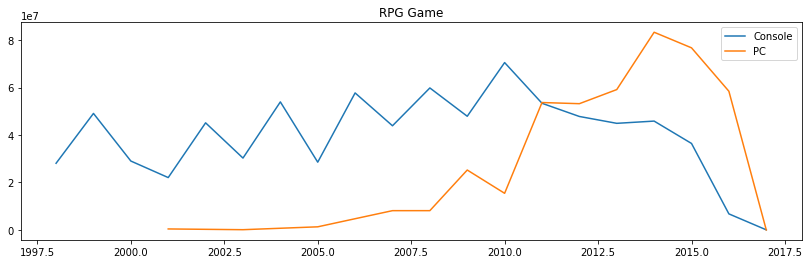

In [56]:
#Final version 
def plot_g(con_index,ste_index ,console_value, steam_value,title='Action'):
    fig, ax =plt.subplots(figsize=(14,4))
    ax.plot(con_index, console_value, label="Console")
    ax.plot(ste_index, steam_value, label="PC")
    ax.set_title(title +" Game")
    ax.legend()
    plt.show()

plot_g(con_index=Action_con.index, ste_index=Action_ste.index, console_value =Action_con.values , 
       steam_value =Action_ste.values, title='Action')

plot_g(con_index=Simulation_con.index, ste_index=Simulation_ste.index, console_value =Simulation_con.values , 
       steam_value =Simulation_ste.values, title='Simulation')

plot_g(con_index=Strategy_con.index, ste_index=Strategy_ste.index, console_value =Strategy_con.values , 
       steam_value =Strategy_ste.values, title='Strategy')

plot_g(con_index=Racing_con.index, ste_index=Racing_ste.index, console_value =Racing_con.values , 
       steam_value =Racing_ste.values, title='Racing')

plot_g(con_index=Sports_con.index, ste_index=Sports_ste.index, console_value =Sports_con.values , 
       steam_value =Sports_ste.values, title='Sports')

plot_g(con_index=Adventure_con.index, ste_index=Adventure_ste.index, console_value =Adventure_con.values , 
       steam_value =Adventure_ste.values, title='Adventure')

plot_g(con_index=RPG_con.index, ste_index=RPG_ste.index, console_value =RPG_con.values , 
       steam_value =RPG_ste.values, title='RPG')

<p>Through comparison Racing and Sports those family relaxing game seem have large groups of audience on console, nervertheless Action ,Simulation and Strategy thoes games with most competitive and highly skill requirement are more suitable on PC Platform

<h3>4.2-5 Game Publisher

<p>Game publisher is the back bone for the entire game industry, thousands of employers  work day and night use their creativity and imagination to deliver fabulous games for audience. Some of the symbolic games and their game publishers are:
    <ul><a href=" https://en.wikipedia.org/wiki/Grand_Theft_Auto"><b>Grand Theft Auto</b></a>
      Developed by: <b>Rockstar Games studio</b>
      Published by: <b>Take two interactive</b></ul>
    <ul><a href="https://en.wikipedia.org/wiki/Halo_(franchise)"><b>Halo</b></a>
      Developed by: <b>Bungie studio</b>
      Published by: <b>Microsoft</b></ul>
    <ul><a href="https://en.wikipedia.org/wiki/Super_Mario"><b>Super Mario</b></a>
    Developed & Published by: <b>Nintendo</b></ul>
     <ul>etc..
      
  

<p>Let's find out the top20 game publishers whose release the most game 

In [57]:
top20_develop=df_console_game["Publisher"].value_counts().sort_values(ascending=False).nlargest(20)
top20_develop

Electronic Arts                           1351
Activision                                 975
Namco Bandai Games                         932
Ubisoft                                    921
Konami Digital Entertainment               832
THQ                                        715
Nintendo                                   703
Sony Computer Entertainment                683
Sega                                       639
Take-Two Interactive                       413
Capcom                                     381
Atari                                      363
Tecmo Koei                                 338
Square Enix                                233
Warner Bros. Interactive Entertainment     232
Disney Interactive Studios                 218
Unknown                                    203
Midway Games                               198
Eidos Interactive                          198
505 Games                                  192
Name: Publisher, dtype: int64

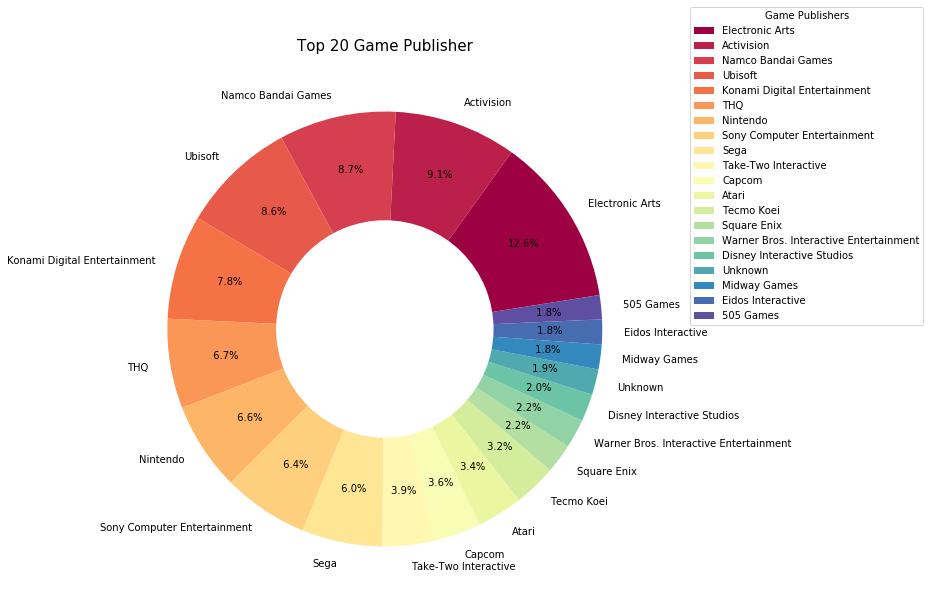

In [58]:
colors = np.linspace(0, 1, top20_develop.size)

plt.figure(figsize=(10,10)) 
plt.pie(top20_develop.values, labels= top20_develop.index, radius=1.0, pctdistance=0.75, autopct='%4.1f%%',
        colors=cm.Spectral(colors),startangle=9)
plt.pie([1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], radius=0.5, colors='w')
plt.title('Top 20 Game Publisher', fontsize=15)
plt.legend(loc='center right',title='Game Publishers',bbox_to_anchor=(1.5,0.8))
plt.show()

<p>One Publisher has more than 10 Game Developers work for them is not a strange thing in modern time, some of the biggest Publisher such as <b>EA</b> and <b>Activision</b> own over 200 Developers this fact which can solve the mystery of their ranks from output table.
    
Fun fact even though <b>EA</b> delivers the most games for audience over the past years it still be labeled as the most hated video Game company across the internet and many countries because of the quality and greedy behavior of their games   
    
 <ul><a href="https://www.usatoday.com/story/money/business/2018/02/01/bad-reputation-americas-top-20-most-hated-companies/1058718001/"><b>Bad reputation: America’s Top 20 most-hated companies</b></a>  

<h3>4.2-6 Top 10 Game Pubilsher and their game genre performace on different region  

<p>Before we move to Game Publisher, lets see how each genres game sales performed on different region

<p>Since our PC dataset does not contains sales number on particular region we may only have to use console's output and assume the same result apply on PC as well  

In [59]:
df_console_game.groupby('Genre')['NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'].sum()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,
Action,877.83,525.00,159.95,187.38,1751.18
Adventure,105.80,64.13,52.07,16.81,239.04
Fighting,223.59,101.32,87.35,36.68,448.91
Misc,410.24,215.98,107.76,75.32,809.96
Platform,447.05,201.63,130.77,51.59,831.37
Puzzle,123.78,50.78,57.31,12.55,244.95
Racing,359.42,238.39,56.69,77.27,732.04
Role-Playing,327.28,188.06,352.31,59.61,927.37
Shooter,582.60,313.27,38.28,102.69,1037.37


<p>NA and EU have the majority sales number contribution which is not surprise consider they are also contribute the most sales number on console as we discuess previously. Also seems like genre Role-Playing is more popular in Japan region compare to others
 


<p>

<p>Once again we only choose some of the common attributes come from both PC and Console dataset. 

In [60]:
top10_publisher= df_console_game[(df_console_game['Year'])&
               (df_console_game["Publisher"].isin(['Electronic Arts','Activision','Namco Bandai Games','Ubisoft','Konami Digital Entertainment ',
                                   'THQ','Nintendo','Sony Computer Entertainment','Sega','Take-Two Interactive ']))&
               (df_console_game['Genre'].isin(['Action','Simulation','Strategy','Racing','Sports','Adventure','Role-Playing']))]

pd.pivot_table(top10_publisher,index=['Genre','Publisher'],values=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'],
              aggfunc=np.sum).sort_values(['Genre'],ascending=True)

EU_Sales  JP_Sales  NA_Sales  \
Genre        Publisher                                                   
Action       Activision                      16.80      0.64     41.29   
             Electronic Arts                 20.90      0.62     28.52   
             Namco Bandai Games               2.38     10.77      2.82   
             Nintendo                        15.42     15.46     27.89   
             Sega                             2.76      3.51      5.11   
             Sony Computer Entertainment     16.73      2.32     29.29   
             THQ                             11.86      1.41     27.05   
             Ubisoft                         26.30      1.00     33.59   
Adventure    Ubisoft                          5.45      0.16      8.97   
             THQ                              3.58      0.14      3.40   
             Sega                             0.24      1.05      0.63   
             Sony Computer Entertainment      2.27      0.75      2.15   
             Namco Bandai Games               0.01      1.32      0.09   
             Electronic Arts                  1.31      0.08      2.00   
             Activision                       0.36      0.10      2.70   
             Nintendo                         2.75      4.48      6.43   
Racing       Activision                       1.69      0.00      5.85   
             Electronic Arts                 26.84      0.54     38.30   
             Namco Bandai Games               0.45      0.29      0.65   
             Nintendo                        17.76     11.33     31.29   
             Sega                             2.00      1.75      1.06   
             Sony Computer Entertainment     23.36      9.33     27.92   
             THQ                              5.21      0.02     14.12   
             Ubisoft                          3.08      0.03      3.85   
Role-Playing Sony Computer Entertainment      6.13      9.86      8.72   
             Ubisoft                          1.82      1.04      4.39   
             THQ                              0.06      0.00      0.21   
             Sega                             0.40      4.19      0.75   
             Nintendo                        19.83     34.98     34.82   
             Namco Bandai Games               6.64     15.12      8.10   
             Electronic Arts                  4.51      2.32      7.79   
             Activision                       4.32      0.16      9.84   
Simulation   Activision                       1.26      0.02      2.90   
             Electronic Arts                 19.92      0.39     25.63   
             Namco Bandai Games               0.17      3.09      0.48   
             Nintendo                        20.65     14.26     20.96   
             Sega                             0.30      0.77      0.08   
             Sony Computer Entertainment      1.90      1.72      2.66   
             THQ                              1.17      0.49      4.60   
             Ubisoft                          7.29      0.38     14.32   
Sports       Ubisoft                          2.02      0.01      5.03   
             THQ                              1.21      0.00      3.06   
             Sony Computer Entertainment      5.77      6.72     15.40   
             Sega                            15.85      5.30     11.07   
             Namco Bandai Games               0.37      4.50      0.54   
             Electronic Arts                 69.93      1.28    132.00   
             Activision                       8.85      0.07     26.32   
             Nintendo                        32.73     21.53     43.63   
Strategy     THQ                              1.94      0.21      1.67   
             Activision                       4.95      0.00      4.54   
             Electronic Arts                  1.37      0.00      4.19   
             Namco Bandai Games               0.04      4.53      0.12   
             Nintendo                         

<p>From the table output we found out the western game Publishers such as <b>EA</b>, <b>Sony</b> and <b>Activision</b> they are more good at create Sports, Racing and Action games the sales number have prove their game popularity.

On the other hand <b>Namco Bandai</b> and <b>Nintendo</b> these Japanese game Publishers have won the market on Simulation and Role-Playing games. 
    
    

<h3>4.2-7 Popular franchises from both Console and PC 

<p>Video games releas across multiplatform can benefit game Publishers sales record  furthermore it can also gain much profit for them except for some exclusive game franchises.

During this part we will randomly pick up some of well known and best selling franchises in game history and see their performance on PC and Console.

All the games title we choose and selling record can refer to:
<ul><a href="https://www.titlemax.com/discovery-center/lifestyle/the-top-50-highest-grossing-video-game-franchises/"><b>THE TOP 50 HIGHEST-GROSSING VIDEO GAME FRANCHISES</b></a></ul>
    
<ul><a href="https://en.wikipedia.org/wiki/List_of_highest-grossing_video_game_franchises"><b>List of highest-grossing video game franchises</b></a></ul>

In [61]:
game_keys=["Mario", "Pokémon", "Call of Duty", "Half-Life","Pac-Man", "Street Fighter","FIFA","Warcraft","Final Fantasy","Grand Theft Auto","Star Wars","The Sims",
"Halo","Assassin's Creed", "Need for Speed","Minecraft","Battlefield","Tom Clancy's","NBA","Resident Evil" ]
rgx2 = fr"(?i){'|'.join(game_keys)}|\d{{2}}/\d{{2}}/\d{{4}}"

In [62]:
#use to extract the common game title 
console_franchises=df_console_game.loc[df_console_game.Name.str.match(rgx2)]
pc_franchises=df_steam_sale.loc[df_steam_sale.ResponseName.str.match(rgx2)]

In [63]:
def common_franchises(title='Call of Duty'): 
    #title ="Call of Duty"
    release_num_pc = pc_franchises.ResponseName.str.contains(title).sum()
    release_num_con = console_franchises.Name.str.contains(title).sum()

    sale_num_con = console_franchises[console_franchises.Name.str.contains(title)]['sale_number'].sum()
    sale_num_pc = pc_franchises[pc_franchises.ResponseName.str.contains(title)]['SteamSpyOwners'].sum()
    print('\n')
    print(f'--------{title}--------')
    print(f"The franchises *{title}* has relasae {release_num_con} games on Console and {release_num_pc} games on PC")
    print(f"There are {sale_num_con} units sold on Console  {sale_num_pc} units sold on PC and global sales number are {sale_num_con+sale_num_pc}")
    if sale_num_con>sale_num_pc:
        print('This franchises is more popular on Console')
    elif sale_num_con <sale_num_pc:
        print('This franchises is more popular on PC')
    else:
        print('Both dataset may not contain this franchises')
        
common_franchises("Call of Duty")        
common_franchises("Pokémon")  
common_franchises("Mario")  
common_franchises("Half-Life")  
common_franchises("Pac-Man")  
common_franchises("Street Fighter")  
common_franchises("FIFA")  
common_franchises("Warcraft")  
common_franchises("Final Fantasy")  
common_franchises("Grand Theft Auto")  
common_franchises("Star Wars")  
common_franchises("The Sims")  
common_franchises("Assassin's Creed")  
common_franchises("Minecraft")  
common_franchises("Battlefield")  
common_franchises("Tom Clancy's")  
common_franchises("NBA")  
common_franchises("Halo")  
common_franchises("Resident Evil")  
common_franchises("Need for Speed")  





--------Call of Duty--------
The franchises *Call of Duty* has relasae 59 games on Console and 18 games on PC
There are 247440000 units sold on Console  22673996 units sold on PC and global sales number are 270113996
This franchises is more popular on Console


--------Pokémon--------
The franchises *Pokémon* has relasae 13 games on Console and 0 games on PC
There are 48059999 units sold on Console  0 units sold on PC and global sales number are 48059999
This franchises is more popular on Console


--------Mario--------
The franchises *Mario* has relasae 65 games on Console and 0 games on PC
There are 213320000 units sold on Console  0 units sold on PC and global sales number are 213320000
This franchises is more popular on Console


--------Half-Life--------
The franchises *Half-Life* has relasae 4 games on Console and 10 games on PC
There are 7700000 units sold on Console  77256807 units sold on PC and global sales number are 84956807
This franchises is more popular on PC


-------

<p>Some of the game title due to the fact incorrect informtion contain in our dataset such as "Warcraft","Assassin's Creed","FIFA" and "Star Wars" appears to be 0 game on PC, but overall most of the titles have bigger market on console.

<p>

<h3>4.2-8 VR Game potential and is single player game dying?

<p>In April 2012, virtual reality headset designed for video gaming has launched this 
invention is defined as the most futuristic technology during the time, many game Developers are also have their first hand experience for this new tech and try to establish development plan for VR gaming. 
    
8 years after until now how many VR games have been released lets found out.

In [64]:
df_steam_sale.loc[:,'CategorySinglePlayer':'CategoryVRSupport']=df_steam_sale.loc[:,'CategorySinglePlayer':'CategoryVRSupport'].astype(int)

In [65]:
df_steam_sale['CategoryVRSupport'].value_counts()

0    12175
1      212
Name: CategoryVRSupport, dtype: int64

In [66]:
VR_game=df_steam_sale.groupby('date_year')['CategoryVRSupport'].value_counts().unstack().fillna(0).rename(columns={0:'Non-VR_game',1:'VR_game'})
VR_game


CategoryVRSupport,Non-VR_game,VR_game
date_year,,
1997,1.0,0.0
1998,1.0,0.0
1999,2.0,0.0
2000,2.0,0.0
2001,4.0,0.0
2003,3.0,0.0
2004,6.0,0.0
2005,6.0,0.0
2006,66.0,0.0


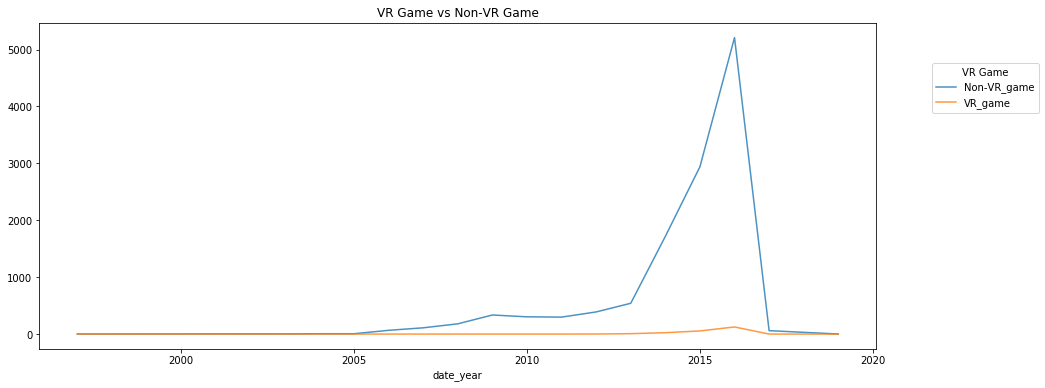

In [67]:
ax = VR_game.plot( alpha=0.8,figsize=(15,6), rot=0)
ax.set_title('VR Game vs Non-VR Game')
ax.legend(loc='center right', title ='VR Game', bbox_to_anchor=(1.2,0.8))

<p>The result is disappointing and reasonable. VR as an accessory of game device is not necessary for majority of gamers price issue may also need to be consider.
    
One of the most critical issues for game Developers and gamers need to overcome is that VR experiences often can cause health-related issues including headaches, eye strain, dizziness, and nausea.

<h3>Single Player

<p>Single Player is the oldest gaming categroy, recently Publishers like <b>EA</b> and <b>Activision</b> claims they are no longer interest in making Single Player game casue there is less marketing and fanbase on all platforms. Are they speak the turth base on statistical evidence? Or the statement it's just another execute to cover their greedy behavior?    

In [68]:
#Number of game release 
singleplayer_game_nb=df_steam_sale[df_steam_sale["table_SinglePlayer"]=='SinglePlayer']['date_year'].value_counts(ascending=True)
multiplayer_game_nb=df_steam_sale[df_steam_sale["table_Multiplayer"]=='Multiplayer']['date_year'].value_counts(ascending=True)

#Total sales number
multiplayer_game_sale=df_steam_sale[df_steam_sale["table_Multiplayer"]=='Multiplayer'].groupby('date_year')['SteamSpyOwners'].sum()
singleplayer_game_sale=df_steam_sale[df_steam_sale["table_SinglePlayer"]=='SinglePlayer'].groupby('date_year')['SteamSpyOwners'].sum()

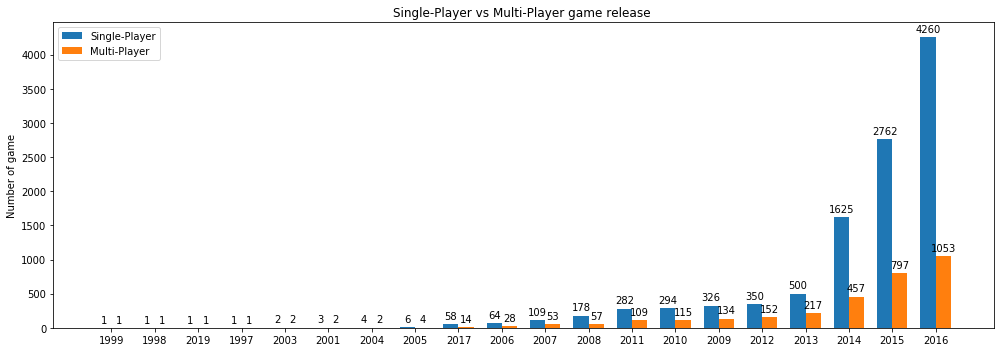

In [69]:
labels=singleplayer_game_nb.index

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(14,5))
single_nb = ax.bar(x - width/2, singleplayer_game_nb.values, width, label='Single-Player')
multi_nb = ax.bar(x + width/2, multiplayer_game_nb.values, width, label='Multi-Player')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of game')
ax.set_title('Single-Player vs Multi-Player game release ')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(single_nb)
autolabel(multi_nb)

fig.tight_layout()

plt.show()



<p>Base on the game release on each years, it clearly emphasis the Single-Player games are still top 1 priority for most of game Developers and the number will constantly increase in the future.

<p>

<p>Now let see if we can get similar result on sales performance

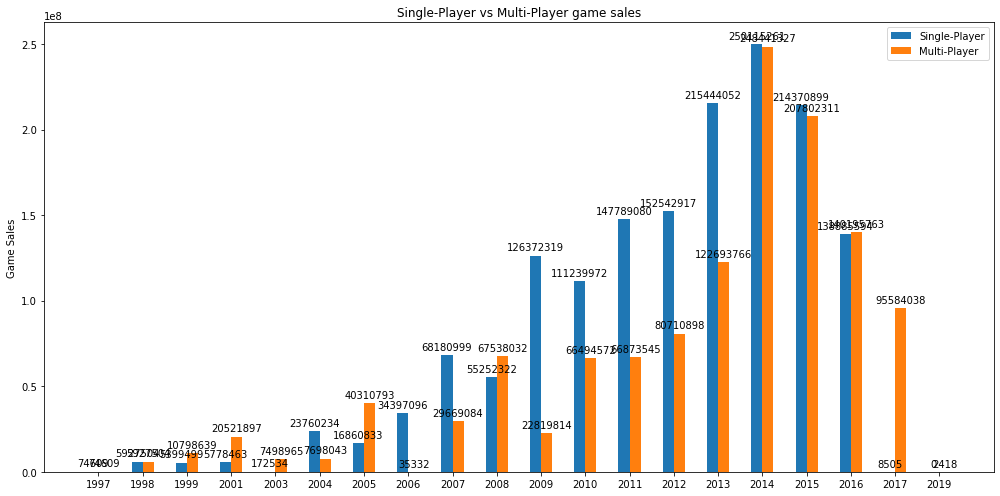

In [70]:
labels=singleplayer_game_sale.index

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(14,7))
single_sale = ax.bar(x - width/2, singleplayer_game_sale.values, width, label='Single-Player')
multi_sale = ax.bar(x + width/2, multiplayer_game_sale.values, width, label='Multi-Player')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Game Sales')
ax.set_title('Single-Player vs Multi-Player game sales')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

autolabel(single_sale)
autolabel(multi_sale)

fig.tight_layout()

plt.show()

<p>Other than some outlier and missing content from the dataset, general speaking Single-Player games are still have better sales performance than Multi-Player games overall.

One possible theory may explain the fact why even though there are less Multi-Player games release by Developers the sales number are still quite approch to Single-Player, due to the fact some of the Multi-Player titles are free on game store which are avliable for everyone whether they would spent money on games or not therefore it can expand their target audience.

<h2>4.2-9 Most profitable games on Console and PC

<p>No matter how good experience we gain from a certain game, if the game itself cannot make any profits or have enough fanbase to support the game Developers will eventually stop make new games for audience

<p>We have already learnt that each platfroms whether is PC or Console they both have unique adventage on certain types of games, now it's time to talk about game profit on each platforms 

<p>First we need to fill out missing attribue "Price" on console database.
All the price are randomly generate between 30-60 $USD base on multiple factors such as:
<ul><li>Game seasons discount
<li>Special edition for certain game 
<li>New game release with full price 


In [71]:
np.random.seed(123)
df_console_game['price']=np.random.randint(30,60,16598)
df_console_game

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,sale_number,price
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,82740000,43
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,40240000,32
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,35820000,58
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,33000000,32
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,31370000,36
...,...,...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,10000,50
16594,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,10000,31
16595,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01,10000,42
16596,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,10000,41


In [72]:
df_steam_sale['profit']=df_steam_sale[['SteamSpyOwners','PriceFinal']].product(axis=1).astype('int64')
df_console_game['profit'] =df_console_game[['sale_number','price']].product(axis=1)

In [73]:
df_console_game['profit'].head()

0    3557820000
1    1287680000
2    2077560000
3    1056000000
4    1129320000
Name: profit, dtype: int64

In [74]:
df_steam_sale['profit'].head()

0    130203006
1     26941708
2     38029298
3     37419835
4     26943500
Name: profit, dtype: int64

In [75]:
#profit on pc 
top20_profit_pc=df_steam_sale.nlargest(20,columns=['profit']).set_index('ResponseName').loc[:,['profit']]

# profit on console 
top20_profit_console=df_console_game.nlargest(20,columns=['profit']).set_index('Name').loc[:,['profit']]

#Rename the index-name
top20_profit_pc.index.name='PC-Game-Title'
top20_profit_console.index.name='Console-Game-Title'

#Give the rank for each of title
top20_profit_pc['Rank'] = range(1, len(top20_profit_pc) + 1)
top20_profit_console['Rank'] = range(1, len(top20_profit_console) + 1)

In [76]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [77]:
display_side_by_side(top20_profit_pc,top20_profit_console)

,profit,Rank
PC-Game-Title,,
Counter-Strike: Global Offensive,387239008,1
Grand Theft Auto V,353105579,2
Left 4 Dead 2,311335034,3
Counter-Strike: Source,308517064,4
Sid Meiers Civilization(r) V,291245515,5
Fallout 4,231924939,6
The Elder Scrolls V: Skyrim,228463171,7
Call of Duty(r): Black Ops II,177591036,8
Portal 2,174742565,9


<p>Call of Duty franchise has multiple appearance on PC's list and Sid Meiers Civilization(r) V is the only strategy game on the list as well, the output clearly demonstrates that Action and Shooting games are the most important game market on PC platform.
    
On the other hand Nintendo's game almost take every single spot on top 14 list which is an extraordinary success as a game and console Developer.
    

<p>Let's see if the same game can appears on both platfrom from top20 list 

In [78]:
top20_profit_pc.merge(top20_profit_console,left_index=True,right_index=True).rename(
    columns={'profit_x':'Profit_on_PC','Rank_x':'Rank_on_PC','profit_y':'Profit_on_Console',
             'Rank_y':'Rank_on_Console'})

,Profit_on_PC,Rank_on_PC,Profit_on_Console,Rank_on_Console
Grand Theft Auto V,353105579,2,966419941,15


<p>Grand Theft Auto has once again prove their game marketing potential across all platforms. With over 9 billion profit income on console compare with 3 billion on PC indicates that the some of the most well known and triple A game tilles have much better performance on console. 
    
Base on the result we easily conclude the console game will still be the primary game market for many game Publishers  

<h2>4.3 Mobile Game

<p>Mobile game has already become by far the biggest Video Games segement and it still bears a huge growth potential for the coming years.

<p>Mobile game will be treats as additional and last platform for our study research

<h3>4.3-1 Popular Game Genre on Mobile

<p>Mobile Games have much more hardware restrictions compare with PC and Console, it nearly impossile for Game Developers to input their Triple A titles or a games with astonishing visual fidelity on Mobile platfrom. Therefore let's found out what are some of popular game genres on the list of most protiable Mobile Games in history.

In [79]:
cat = [item.split('/') for item in df_mobile_game.Genre.unique()]
cat2 = list(chain.from_iterable(cat))

In [80]:
df_mobile_game.Genre=df_mobile_game.Genre.str.replace(' ','')

In [81]:
game_genre=list(map(str.strip, cat2))
game_genre=list(dict.fromkeys(cat2))
game_genre,len(game_genre)

(['Physics ',
  ' Puzzle',
  'Puzzle ',
  ' RPG',
  'MOBA',
  'Strategy',
  'Puzzle',
  'Augmented reality',
  'RPG ',
  ' Gacha',
  'MMORPG',
  'Real-time strategy',
  'Battle royale',
  'TBS ',
  ' MMO',
  'Simulation',
  'Strategy ',
  'Racing',
  'DCCG',
  'Sports ',
  ' Baseball',
  'DCCG ',
  ' Rhythm',
  'Sandbox ',
  ' Survival',
  'Tactical RPG',
  'Action RPG',
  ' Pool'],
 28)

In [82]:
df_mobile_game.Genre.str.split('/',expand=True).unstack().value_counts()

Puzzle               8
Strategy             6
Battleroyale         4
RPG                  4
MMORPG               4
Sports               3
Gacha                3
MMO                  2
Augmentedreality     2
Baseball             2
DCCG                 2
MOBA                 2
Racing               1
Physics              1
Survival             1
Real-timestrategy    1
Sandbox              1
Pool                 1
ActionRPG            1
TacticalRPG          1
Simulation           1
Rhythm               1
TBS                  1
dtype: int64

<p>We can immediately notice that Action game may not suitable on Mobile platform as there is 0 apperance on the list, also surprisingly Puzzle and Stratgy have well received outcome consider there are the lowest popularity game types on other platforms

<h3>4.3-2 Is there any Triple A Game Publishers from top-20 list also invole in Mobile Game industry

<p>We will used the output table from previous sectoin in this comparison

In [83]:
rgx3 = fr"(?i){'|'.join(top20_develop.index)}|\d{{2}}/\d{{2}}/\d{{4}}"

In [84]:
df_mobile_game.loc[df_mobile_game.Publisher.str.match(rgx3)]

,Game_Name,Revenue,Release_date,Publisher,Genre
35,Fire Emblem Heroes,500000000,2017-02-02,Nintendo,TacticalRPG
39,Dragon Quest Walk,325000000,2019-09-12,Square Enix,Augmentedreality


In [85]:
display(df_console_game[df_console_game['Publisher']=='Nintendo'].head(1).drop(['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales','sale_number','price'],axis=1))
display(df_console_game[df_console_game['Publisher']=='Square Enix'].head(1).drop(['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales','sale_number','price'],axis=1)) 

,Name,Platform,Year,Genre,Publisher,profit
0,Wii Sports,Wii,2006,Sports,Nintendo,3557820000


,Name,Platform,Year,Genre,Publisher,profit
147,Final Fantasy XII,PS2,2006,Role-Playing,Square Enix,309400000


<p>It appears some Japanese Game Publishers like Nintendo and Square Enix have also successful open up their market on Mobile platform.
    
The title Final Fantasy as one of the best-selling Japanese role-playing game (JRPG) franchises, still has less profit income compare to one Mobile Game developed by same Game company which is a sad truth in modern game industry. 

<h3>4.3-3 Top 10 Revenue campare across Three platforms 

<p>Now it's time to decide which platforms have ultimately gain the most of the revenue through overall comparison.

In [86]:
top10_mobile_revenue=df_mobile_game.nlargest(10,columns=['Revenue']).set_index('Game_Name').loc[:,['Revenue']].rename(columns={"Revenue":"profit"})
top10_mobile_revenue.index.name='Mobile-Game-Title'
top10_mobile_revenue['Rank'] = range(1, len(top10_mobile_revenue) + 1)

In [87]:
display_side_by_side(top20_profit_pc.head(10),top20_profit_console.head(10),top10_mobile_revenue)

,profit,Rank
PC-Game-Title,,
Counter-Strike: Global Offensive,387239008,1
Grand Theft Auto V,353105579,2
Left 4 Dead 2,311335034,3
Counter-Strike: Source,308517064,4
Sid Meiers Civilization(r) V,291245515,5
Fallout 4,231924939,6
The Elder Scrolls V: Skyrim,228463171,7
Call of Duty(r): Black Ops II,177591036,8
Portal 2,174742565,9


In [88]:
display(top20_profit_pc.profit.head(10).values)
display(top20_profit_console.profit.head(10).values)
display(top10_mobile_revenue.profit.values)

array([387239008, 353105579, 311335034, 308517064, 291245515, 231924939,
       228463171, 177591036, 174742565, 145505270])

array([3557820000, 2077560000, 1631340000, 1557050000, 1470490000,
       1422220000, 1287680000, 1287520000, 1160800000, 1129320000])

array([8120000000, 7703000000, 6750000000, 6400000000, 5410000000,
       4700000000, 4049000000, 2800000000, 2529000000, 2000000000])

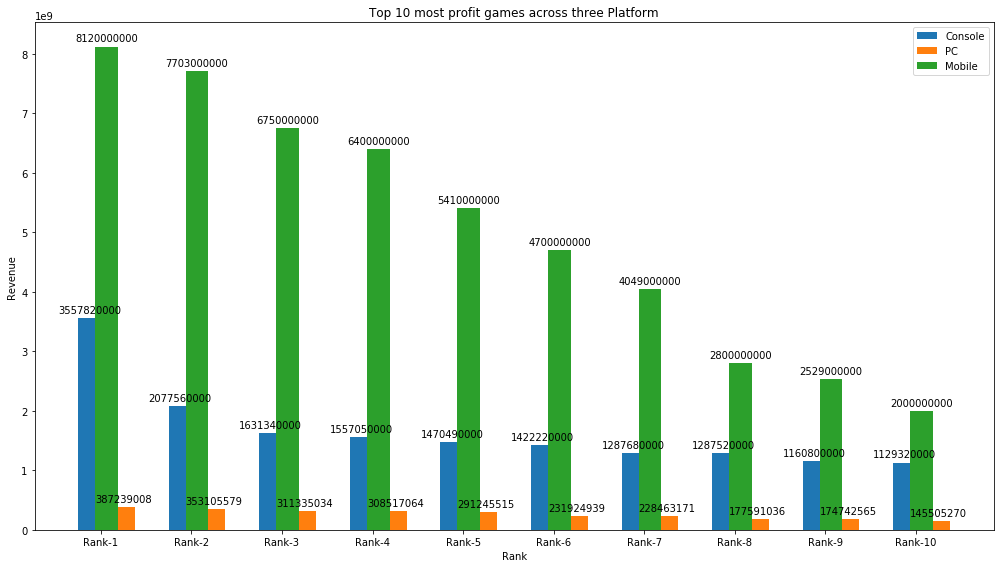

In [89]:
labels=top10_mobile_revenue.Rank.values
Rank=['Rank-1','Rank-2','Rank-3','Rank-4','Rank-5','Rank-6','Rank-7','Rank-8','Rank-9','Rank-10']

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(14,8))

console_profit = ax.bar(x - width/2, top20_profit_console.profit.head(10).values, width, label='Console')
pc_profit = ax.bar(x + width, top20_profit_pc.profit.head(10).values, width, label='PC')
mobile_profit= ax.bar(x + width/4, top10_mobile_revenue.profit.values, width, label='Mobile')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Revenue')
ax.set_xlabel('Rank')
ax.set_title('Top 10 most profit games across three Platform')
ax.set_xticks(x)
ax.set_xticklabels(Rank)
ax.legend()

autolabel(console_profit)
autolabel(pc_profit)
autolabel(mobile_profit)

fig.tight_layout()

plt.show()

<p>The result is undoubtedly obvious, Mobile Games have dominate Video Game market and their statistical revenue have also crash the other competitors.
    
Everything happens for a reason, one of the biggest influence for Mobile Games win the competition other than large group of audience is their <b>"Game Marketing Strategy"</b>. Mobile Games have the worst reputation whether is from gamers, social media, internet even parents, due to the fact the game itselt rely heavily on <b>"Payment System"</b> another famous name <a href="https://en.wikipedia.org/wiki/Microtransaction"><b>Microtransactions</b></a> is a better description in this case. <b>Microtransactions</b> are often label as <b>free-to-play</b> games on game store and by allowing players spend extra cash give them a disproportionate advantage over other players in order to help publihser gain revenue, children are the particularly group which are heavily influenced by this system consider they have weak self-discipline. 
    
Game Publishers like <b>EA</b> and <b>Take Two</b> see the <b>Microtransactions</b> as a huge business opportunity by adding payment system into their famous game franchise such as "FIFA" and "NBA 2K" try to force players pay more money for their greediness instead of pleasing their fans using high quality games. One of the most dishonourable event happend recently shocked both Game and Movie industry can refer as <b>EA</b>'s <b>"STAR WARS"</b> games with "Gambling system" get banned across many countries.
    <ul><li><a href="https://www.engadget.com/2017-11-22-belgium-moves-to-ban-star-wars-battlefront-2-style-loot-boxes.html?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAANaM1B2AMU0VnUvnjKsdE-bIEoKs_d1NaNTyqxCvYTF0bDFLp5FdOSDQNFTHDySQvHzsQ8AxZ0_TrCrYCRfjblo9582oQaYNfPgLICeAspamqS1ArqvaUkjs_4SJaxEc1ajAr32ecToZIw99ELqYCgLG4aSdQBNZQkTvXWtxkBP-"><b>Belgium moves to ban 'Star Wars Battlefront 2'-style loot boxes</b></a>
    
   

<hr style="height:5px;border:none;color:#333;background-color:#333;" />
<h1>5. Results/Insights</h1>

Discuss any non-trivial result or insight into the problem stemming from your analysis.

<b>Create as many code, markdown and raw cells as needed</b>

<p>With combination of our analysis results and latest tech news we can address some of the issues in our previous discussion

<h3>Console    

<p><b>Sony</b> vs <b>Microsoft</b> vs <b>Nintendo</b>:The Console war. Fanboys(like me) and  game journalists love to talk about these all the time. The conslusion about who’s winning and losing rises to a roaring crescendo when those companies release their new console in the next generation. 
    
This year is no exception. <b>Sony</b> and <b>Microsoft</b> has already reveal their next generation consoles <b>PS5</b> and <b>Xbox series X</b>. Both consoles have choose SSD as their main storage media and include latest technology <b>Ray Tracing</b> for the first time, with their unique customization give them different advantages. 
<b>Xbox series x</b> is advertising as the most powerful console by giving amount of hardware power aim for better visual fidelity and stable framerate game play for future gaming. <b>PS5</b> may has different approach for future gaming by using their own architecture design on SSD to achieve better game output which means no loading time during the game play and allow palyers be able to access different environment instantly. Which one is more important? Only time and marketing will tell.


Base on our console sales performance we notice the amount hardware sales record has been decrease over the past years because of muliplayer game has slightly become more popular than single player game. People love to play game with their friends who live anywhere, there are also tens of millions game-related content on Twitch, YouTube  and other streaming platforms every day. Therefore the real competition and key to successed in future gaming is in the cloud. The evidence can be seen as <b>Google</b> launched their first cloud game device <a href="https://en.wikipedia.org/wiki/Google_Stadia"><b>Stadia</b></a> on November 19, 2019. <b>Microsoft</b> has also see the potential marketing on cloud gaming by pushing their own subscribe servers <a href="https://en.wikipedia.org/wiki/Xbox_Game_Pass"><b>Xbox Game pass</b></a>, within 2 years there are already have more than 10 million subscribers, by 2021 <b>Microsoft</b> will official launch their cloud gaming steam server <a href="https://en.wikipedia.org/wiki/XCloud"><b>Project X Cloud</b></a> to break the barrier between traditional console hardware and new technology 

<h3>PC

<p>The competition between <b>Intel</b>, <b>AMD</b> and <b>Nvidia</b> is accelerating PC gaming industry over the past years. PC is undoubtedly the best platform to provide high quality of gaming experience whether in terms of better visual effect or stable game play compare with console.
    
The downside of PC's high performance on gaming is the requirement of hardware and accessories need to be constantly upgrade by players such as: 
    <ul><li>Advance clock speed CPU</li> <li>Bigger capcity of Memroy Cards</li> <li>Latest tech support graphics card</li> <li>High pixs count monitor</li> <li>etc..</li></ul>
    
Those extra cost may not sutiable for average consumers, as result there are definitely less games sales compare with console also there are less revenue income on the platform itself.

<h3>Mobile 

<p>Many players include me may not like the Mobile Games due to their lack of gameplay experience and greedy payment system. However is undeniably that the competition in the modern game industry isn’t about who sells the most consoles, games or even have largest fanbase, it’s all about who can makes the most profit through their product. Mobile Game has clearly proven that point. In fact accoring to scientific research article <a href="https://www.businessofapps.com/data/app-revenues/"><b>App Revenue Statistics (2019)</b></a> Mobile games have already gain 152.1 Billion revenue in 2019 and this number will constantly keep increase 15% each year in the future.
    

<h3>Game Publishers/Developers 

<p>As a gamer I strongly believe the game community always pay the greatest gratitude and respect to thoes Game Publishers and Developers who overdeliver their game contents to surpassed our expectation, we also deeply in our heart wish thoes companies can continuously growing and success in the furture. 
    
It reasonable for some Game Devleopers try to gain much more profit from inside payment system instead of game quality itself, however if  <b>Microtransactions</b> become the major marketing strategy in game industry soon all the other companies will follow this method by spending less time on new concept of creativity and polish their games this may lead entire game industry into the "Dark Age" once again. 
    
The Game Publishers are divided into two largest groups which are Japanese and Western. Each of them have their pro and con for instance:
    <ul><b>Japanese</b><li>Good at Role-Playing RPG <li>Creativity on Story telling<li>Heavily Anime culture influence</ul> 
    <ul><b>Western</b>  
    <li>Advance game engine and realistic game graphics
    <li>Much more complex AI design and interacting game environment
    <li>Social media and streaming severs influence</ul>    

<hr style="height:5px;border:none;color:#333;background-color:#333;" />
<h1>6. In hindsight...</h1>

In this section you should reflect on your work and what you've learned. In particular you should include:

<ul>
    <li> a discussion of the most challenging aspect of the data analysis and if/how you overcame the challenge.</li>
    <li> a discussion of any programming technique and/or reference you found particularly useful or helpful for your project.</li>
    <li> an assessment of the outcome of the study in relation to the original goals (i.e., have the goals been reached, or did you have to reassess the goals during the project, and if so why?).</li>
    <li> a discussion of what new, or surprising knowledge or insight into the problem you've gained by conducting the study.</li>
    <li> a discussion of whether you would approach the problem differently if given an opportunity to redo the work, and any advice they would give to someone who would want to work on a similar problem.</li>
    <li> a discussion of how your analysis could be improved or extended in future work.</li>

</ul>

<b>Challenges</b>

<p>Data preparation is my barrier need to be overcome, since the project itself video game have variety contents on the internet I have to select some of the most valuable resource base on scientific research report, technical articles and my personal interest.
    
Data cleaning may be the most time consuming part in the project, consider some of the dataset I choose with missing attributes or unstructured values I have to accept the consequence of lossing potential information for drop some these values.
    
It's to easy use dataset generate table or graphs output, however it's hard to explain some of the unpredictable   results. The method I choose to resolve this issue by spending time reading related articles from multipe source and combine with my personal experience to give a quite reliable explanation

<b>Programming technique / reference </b>

<p>Firstly I would like especially thanks to thoes people one the "Hall of Fame" their projects are the biggest motivation and inspiration for me. I choose some of their project presentation layout and programming technique as reference in my project as well.
    
I have come across website <a href="https://matplotlib.org/3.1.1/index.html"><b>matplotlib</b></a> so many times just for getting new ideas of how to use different techniques to create unique graphs. The techniques of <b>Broken Bar</b> and <b>Nested pie charts</b> etc.. can be found in the website. 
   
<a href="https://stackoverflow.com"><b>Stack overflow</b></a> is another realiable source for coding techniques, there are hundred thousand programers may encounter the same issue like mine. I have learn much more new stuff thanks to the website friendly community.      

<b>Assignment Outcome</b>

<p>The main purpose of this project is try to analyse the overall game industry development history and based on their sales record, revenue income, game genres and popularity on the current market make perdiction to the future gaming. 
    
Generally speaking Video Games will definitely keep growing in the future and also there is a high possibility that more than 10 billion audience around the world will join the game community in the next 10 years.

<b>New insights</b>

<p>As a typical console player it's hard to believe that the console is losing their potential market and the hardware sales number may keep decrease in the new generation, which is why companies like <b>Google</b>, <b>Amazon</b> and <b>Microsoft</b> decide expand their new game market on cloud, it's not a bad thing as we speak before video game need to keep evolving in order to embrace and overcome the upcoming challenges in the future. 
    
There are still a lot of potential need to be explore on VR games even though the games release and sales may not quite as magnificent as others, if Game Developers can overcome the disadvantages of VR games the more audience be able to experience VR games on PC the bigger profit will gain.       

<b>Improvement and Extensions</b>

<p>The project itself still have much more area can be explore, as we mention before the analyse results on Mobile Game section is not sophisticated compare with other sections. 
    
Missing values and contents drop is the second issue need to be pay attention, any large gruop of missing or incorrect information on the dataset can easily distribute entire model results lead analysts to wrong direction.
    
Programming code technique over repetitive in the next issue in my project, some of the graphical techniques such as muliple pie charts and bar charts involve repetitive coding which is unclean and unskilled clearly there is always a better way to achieve the same result.     
    
Better data cleaning technique such as regular expression should have much better performance during the data preparation section.     

<h1>7. Reference </h1>

<b>Dataset Reference link</b>

https://www.vgchartz.com/analysis/platform_totals/Hardware/Global/ 

https://data.world/julienf/video-games-global-sales-in-volume-1983-2017/contributors 

https://github.com/GregorUT/vgchartzScrape 

https://steamcommunity.com/dev

https://developer.valvesoftware.com/wiki/Steam_Web_API#GetPlayerSummaries_.28v0001.29

https://github.com/CraigKelly/steam-data

https://en.wikipedia.org/wiki/List_of_highest-grossing_mobile_games

<b>Graphs/plot and coding technique</b>

https://matplotlib.org/3.1.1/index.html

https://stackoverflow.com/questions/19377969/combine-two-columns-of-text-in-dataframe-in-pandas-python

https://chrisalbon.com/python/data_wrangling/pandas_create_column_using_conditional/

https://stackoverflow.com/questions/37683997/creating-a-new-column-based-on-condition-with-values-from-another-column-in-pyth

https://www.geeksforgeeks.org/python-pandas-series-str-match/

https://realpython.com/search?q=oop

https://pymotw.com/3/datetime/

https://stackoverflow.com/questions/16233593/how-to-strip-comma-in-python-string

<b>Research and article reading</b>

https://wiki2.org/en/Timeline_of_video_game_console_releases

https://www.preceden.com/timelines/191578-history-of-video-game-consoles

https://en.wikipedia.org/wiki/Ralph_H._Baer

https://en.wikipedia.org/wiki/Magnavox_Odyssey

https://en.wikipedia.org/wiki/Snake_(video_game_genre)

https://en.wikipedia.org/wiki/Video_game_crash_of_1983

https://www.sciencedirect.com/book/9781931836319/game-console-hacking

https://en.wikipedia.org/wiki/Xbox_Live

https://en.wikipedia.org/wiki/PlayStation_Network

https://www.usatoday.com/story/money/business/2018/02/01/bad-reputation-americas-top-20-most-hated-companies/1058718001/

https://www.titlemax.com/discovery-center/lifestyle/the-top-50-highest-grossing-video-game-franchises/

https://en.wikipedia.org/wiki/List_of_highest-grossing_video_game_franchises

https://en.wikipedia.org/wiki/Microtransaction

https://www.engadget.com/2017-11-22-belgium-moves-to-ban-star-wars-battlefront-2-style-loot-boxes.html?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAANaM1B2AMU0VnUvnjKsdE-bIEoKs_d1NaNTyqxCvYTF0bDFLp5FdOSDQNFTHDySQvHzsQ8AxZ0_TrCrYCRfjblo9582oQaYNfPgLICeAspamqS1ArqvaUkjs_4SJaxEc1ajAr32ecToZIw99ELqYCgLG4aSdQBNZQkTvXWtxkBP-

https://www.businessofapps.com/data/app-revenues/

https://www.forbes.com/sites/kevinmurnane/2020/02/09/there-is-no-console-war-because-xbox-moved-on-and-left-playstation-behind/#65f813a74c23